##                        Sales of summer clothes in E-commerce Wish

### Problem Statement

The dataset contains product listings as well as products ratings and sales performance.With this,
1.  We can start to look for correlations and patterns regarding the success of a product and the various components, 

2.  May look for top categories of products so that you know what sells best

3.  How about the relationship between the quality of a product (ratings) and its success ?

4.  Does the price factor into this ?

5.  Build a model on product price as a dependent variable.

### Infos on Columns
1. **title** : Title for localized for european countries. May be the same as title_orig if the seller did not offer a translation.

2. **title_orig** : Original english title of the product.

3. **price** : price for the buyer

4. **retail_price** : Retail price, or reference price in other stores/places. Used by the seller to indicate a regular value or the price before discount.

5. **currency_buyer** : currency of the prices

6. **units_sold** : Number of units sold. Lower bound approximation by steps

7. **uses_ad_boosts** : Whether the seller paid to boost his product within the platform (highlighting, better placement or whatever).

8. **rating** : Mean product rating.

9. **rating_count** : Total number of ratings of the product

10. **rating_five_count** : Number of 5-star ratings (there are also similar rating columns for four, three .. stars)

11. **badges_count** : Number of badges the product or the seller have.

12. **badge_local_product** : A badge that denotes the product is a local product. Conditions may vary (being produced locally, or something else). Some people may prefer buying local products rather than. 1 means Yes, has the badge.

13. **badge_product_quality** : Badge awarded when many buyers consistently gave good evaluations 1 means Yes, has the badge

14. **badge_fast_shipping** : Badge awarded when this product's order is consistently shipped rapidly

15. **tags** : tags set by the seller

16. **product_color** : Product's main color

17. **product_variation_size_id** : One of the available size variation for this product

18. **product_variation_inventory** : Inventory the seller has. Max allowed quantity is 50

19. **shipping_option_price** : shipping price

20. **shipping_is_express** : whether the shipping is express or not. 1 for True

21. **countries_shipped_to** : Number of countries this product is shipped to. Sellers may choose to limit where they ship a product to

22. **inventory_total** : Total inventory for all the product's variations (size/color variations for instance)

23. **has_urgency_banner** : whether there was an urgency banner with an urgency

24. **merchant_rating** : merchant's rating

#### 1) Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#to display entire rows and columns
pd.options.display.max_columns=None
pd.options.display.max_rows=None
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
#set the plot size
plt.rcParams['figure.figsize'] = (10, 6)

#### 2) Load the dataset

In [5]:
data=pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')
data.head(2)

title  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...   
1  SSHOUSE Summer Casual Sleeveless Soirée Party ...   

                                          title_orig  price  retail_price  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...   16.0            14   
1   Women's Casual Summer Sleeveless Sexy Mini Dress    8.0            22   

  currency_buyer  units_sold  uses_ad_boosts  rating  rating_count  \
0            EUR         100               0    3.76            54   
1            EUR       20000               1    3.45          6135   

   rating_five_count  rating_four_count  rating_three_count  rating_two_count  \
0               26.0                8.0                10.0               1.0   
1             2269.0             1027.0              1118.0             644.0   

   rating_one_count  badges_count  badge_local_product  badge_product_quality  \
0               9.0             0                    0                      0   
1            1077.0             0                    0                      0   

   badge_fast_shipping                                               tags  \
0                    0  Summer,Fashion,womenunderwearsuit,printedpajam...   
1                    0  Mini,womens dresses,Summer,Patchwork,fashion d...   

  product_color product_variation_size_id  product_variation_inventory  \
0         white                         M                           50   
1         green                        XS                           50   

  shipping_option_name  shipping_option_price  shipping_is_express  \
0   Livraison standard                      4                    0   
1   Livraison standard                      2                    0   

   countries_shipped_to  inventory_total  has_urgency_banner  \
0                    34               50                 1.0   
1                    41               50                 1.0   

         urgency_text origin_country merchant_title merchant_name  \
0  Quantité limitée !             CN       zgrdejia      zgrdejia   
1  Quantité limitée !             CN      SaraHouse     sarahouse   

              merchant_info_subtitle  merchant_rating_count  merchant_rating  \
0                        (568 notes)                    568         4.128521   
1  83 % avis positifs (17,752 notes)                  17752         3.899673   

                merchant_id  merchant_has_profile_picture  \
0  595097d6a26f6e070cb878d1                             0   
1  56458aa03a698c35c9050988                             0   

  merchant_profile_picture                                      product_url  \
0                      NaN  https://www.wish.com/c/5e9ae51d43d6a96e303acdb0   
1                      NaN  https://www.wish.com/c/58940d436a0d3d5da4e95a38   

                                     product_picture  \
0  https://contestimg.wish.com/api/webimage/5e9ae...   
1  https://contestimg.wish.com/api/webimage/58940...   

                 product_id   theme crawl_month  
0  5e9ae51d43d6a96e303acdb0  summer     2020-08  
1  58940d436a0d3d5da4e95a38  summer     2020-08

In [6]:
#print shape
print('Dimensions of dataset :',data.shape)

Dimensions of dataset : (1573, 43)


In [7]:
#check the datatypes and null vallue presence
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

Interpretation:
   All features are in correct format but some features has nan values.

### 3) Exploratory data Analysis

#### 3.1) Univariate Analysis

In [8]:
#Check price range
print('Price range is lies between :',data['price'].min(), 'to',data['price'].max())

Price range is lies between : 1.0 to 49.0


In [9]:
#check the mean of unit price
print('mean of unit price :',data['price'].mean())

mean of unit price : 8.325371900826434


In [10]:
#check the median of unit price
print('median of unit price :',data['price'].median())

median of unit price : 8.0


In [11]:
#check the mode of unit price
print('mode of unit price :',data['price'].mode()[0])

mode of unit price : 8.0


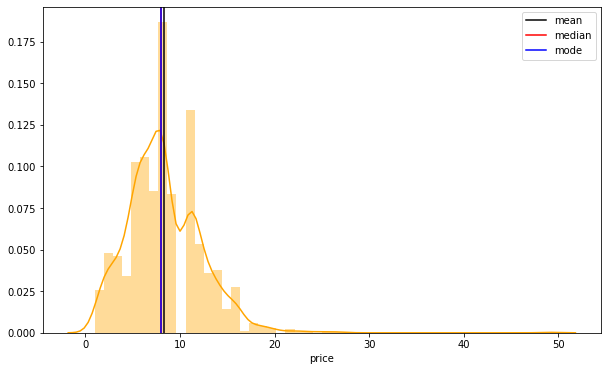

skewness of price : 1.31589130005404


In [12]:
#check distribution of price 
sns.distplot(data.price,color='orange')
plt.axvline(x=data['price'].mean(), color='black',label='mean')
plt.axvline(x=data['price'].median(), color='red',label='median')
plt.axvline(x=data['price'].mode()[0], color='blue',label='mode')
plt.legend()
plt.show()

print('skewness of price :',data.price.skew())

In [13]:
print('three sigma value is :',data['price'].mean()+3*data['price'].std())  
# price of the product is not folowing Gaussian distribution

three sigma value is : 20.12146134553747


 Interpretation: Some products cost are high compared to others products cost.

In [14]:
#Check the which product is sold more
print('This is the product peoples are preferred more:',data['title'].mode()[0])
#French-> English:New Summer Fashion Women Casual Dress O-neck Loose Big Swing Sleeveless Skirt Soild Color Beach Dress

This is the product peoples are prepared more: Nouvelle mode d'été femmes robe décontractée col rond lâche Big Swing jupe sans manches Soild couleur robe de plage


In [15]:
#Top merchant 
print('Top seller :',data['merchant_name'].mode()[0])
#Chinese-> English:Guangzhou Wei Shi Wei Clothing Co., Ltd

Top seller : 广州唯适唯服饰有限公司


In [16]:
print('Top5 colors Peoples choosing most is:','\n',data['product_color'].value_counts()[:5])

Top5 colors Peoples choosing most is: 
 black     302
white     254
yellow    105
blue       99
pink       99
Name: product_color, dtype: int64


In [17]:
import plotly.graph_objects as go
labels = data.origin_country.value_counts(normalize=True).index.values

values  =data.origin_country.value_counts().values

# Create Pie Chart

fig = go.Figure()
fig.add_trace(go.Pie(labels=labels, values=values))#New traces can be added to a graph object figure using the add_trace() method. This method accepts a graph object trace (an instance of go.Scatter, go.Bar, etc.) and adds it to the figure
fig.update_layout(title="Country of Origin of Product in Wish", legend_title="Countries", template="plotly_white")#updating properties

Interpretation: Seems that products mostly originate from Canada

In [18]:
data1=data.copy()

In [19]:

data1['discounted_price'] = data1['retail_price'] - data1['price']
prices_by_country = data1[['price','discounted_price','retail_price','origin_country']].groupby('origin_country').mean()

In [20]:
fig = go.Figure()

fig.add_trace(go.Bar(x=prices_by_country.index.values, y=prices_by_country.price, name="Price"))
fig.add_trace(go.Scatter(x=prices_by_country.index.values, y=prices_by_country.discounted_price, name="Discounted Price"))
fig.add_trace(go.Bar(x=prices_by_country.index.values, y=prices_by_country.retail_price, name="Retail Price"))
fig.update_layout(title="Prices Categories By Country", xaxis_title="Countries", yaxis_title="Avg Discount Prices", template="plotly_white", legend_title="Legend")

Interpretation:
The graph, displays that there is a heavy discounts on prodcuts from Venezuela as displayed by red line by avg of around 27 euros.

Surprisingly, from the period of July,2020, when the data was taken, selling prices are higher than retail prices in countries like Austria, GB and Singapore. Canada where most of the product in the data is coming from is sold on average of around 8.5 euros with discounts on average of around 14 euros.

In [21]:
data1[data.origin_country=="CN"]['price'].describe()

count    1516.000000
mean        8.341629
std         3.940071
min         1.000000
25%         5.830000
50%         8.000000
75%        11.000000
max        49.000000
Name: price, dtype: float64

About 75% of products coming from Canada are near 10 euros.

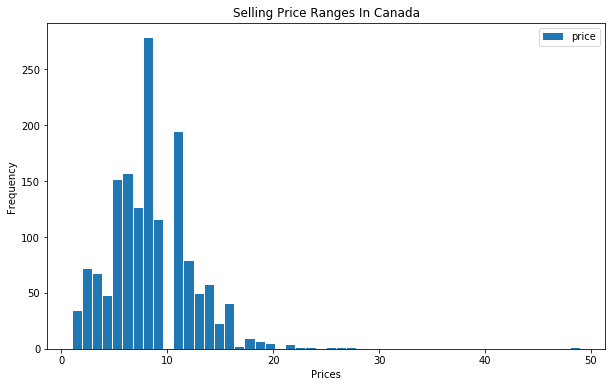

In [22]:

data1[data1.origin_country=="CN"]['price'].plot(kind="hist", bins=50,rwidth=.9)

plt.title("Selling Price Ranges In Canada")
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.legend()

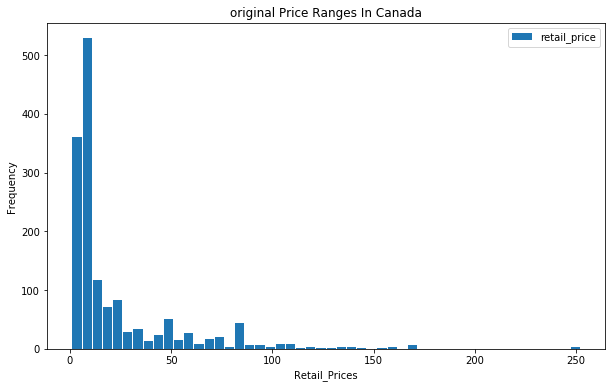

In [23]:

data1[data1.origin_country=="CN"]['retail_price'].plot(kind="hist", bins=50,rwidth=0.9)
plt.title("original Price Ranges In Canada")
plt.xlabel('Retail_Prices')
plt.ylabel('Frequency')
plt.legend()

In [24]:
data1['shipping_option_name'].value_counts()

Livraison standard         1508
Standard Shipping            21
Envio Padrão                  9
Expediere Standard            6
Envío normal                  5
الشحن القياسي                 4
Livraison Express             3
Standardowa wysyłka           3
Стандартная доставка          3
Standardversand               3
การส่งสินค้ามาตรฐาน           2
Spedizione standard           2
Standart Gönderi              2
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Ekspresowa wysyłka            1
Name: shipping_option_name, dtype: int64

Livraison standard is quite populuar option for shipping. Lets check the prices of the company.

In [25]:
livrasion_prices = data1[data1.shipping_option_name =='Livraison standard']['shipping_option_price'].value_counts().index.values
livrasion_prices_frquency = data1[data1.shipping_option_name =='Livraison standard']['shipping_option_price'].value_counts().values

fig = go.Figure()
fig.add_trace(go.Pie(labels=livrasion_prices, values=livrasion_prices_frquency))
fig.update_layout(title="Livrasion Standard Prices", legend_title="Prices In Euros", template="plotly_white")

Interpretation:
    Most customers choose shipping options from 1-3 euros

#### 3.2) Multivariate Analysis

In [26]:
#print the 5point summary 
data.describe(include='all')

title  \
count                                                1573   
unique                                               1201   
top     Nouvelle mode d'été femmes robe décontractée c...   
freq                                                   24   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                               title_orig        price  \
count                                                1573  1573.000000   
unique                                               1203          NaN   
top     New Fashion Summer Women Casual Dress Round Ne...          NaN   
freq                                                   24          NaN   
mean                                                  NaN     8.325372   
std                                                   NaN     3.932030   
min                                                   NaN     1.000000   
25%                                                   NaN     5.810000   
50%                                                   NaN     8.000000   
75%                                                   NaN    11.000000   
max                                                   NaN    49.000000   

        retail_price currency_buyer     units_sold  uses_ad_boosts  \
count    1573.000000           1573    1573.000000     1573.000000   
unique           NaN              1            NaN             NaN   
top              NaN            EUR            NaN             NaN   
freq             NaN           1573            NaN             NaN   
mean       23.288620            NaN    4339.005086        0.432931   
std        30.357863            NaN    9356.539302        0.495639   
min         1.000000            NaN       1.000000        0.000000   
25%         7.000000            NaN     100.000000        0.000000   
50%        10.000000            NaN    1000.000000        0.000000   
75%        26.000000            NaN    5000.000000        1.000000   
max       252.000000            NaN  100000.000000        1.000000   

             rating  rating_count  rating_five_count  rating_four_count  \
count   1573.000000   1573.000000        1528.000000        1528.000000   
unique          NaN           NaN                NaN                NaN   
top             NaN           NaN                NaN                NaN   
freq            NaN           NaN                NaN                NaN   
mean       3.820896    889.659250         442.263743         179.599476   
std        0.515374   1983.928834         980.203270         400.516231   
min        1.000000      0.000000           0.000000           0.000000   
25%        3.550000     24.000000          12.000000           5.000000   
50%        3.850000    150.000000          79.000000          31.500000   
75%        4.110000    855.000000         413.500000         168.250000   
max        5.000000  20744.000000       11548.000000        4152.000000   

        rating_three_count  rating_two_count  rating_one_count  badges_count  \
count          1528.000000       1528.000000       1528.000000   1573.000000   
unique                 NaN               NaN               NaN           NaN   
top                    NaN               NaN               NaN           NaN   
freq                   NaN               NaN               NaN           NaN   
mean            134.549738         63.711387         95.735602      0.105531   
std             311.690656        151.343933        214.075544      0.340709   
min               0.000000          0.000000          0.000000      0.000000   
25%               4.000000          2.000000    

In [27]:
#split the dataset into categorical and numerical for better understanding 
cat_data=data.select_dtypes(exclude=np.number)
num_data=data.select_dtypes(include=np.number)

In [28]:
cat_data.head(2)

title  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...   
1  SSHOUSE Summer Casual Sleeveless Soirée Party ...   

                                          title_orig currency_buyer  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...            EUR   
1   Women's Casual Summer Sleeveless Sexy Mini Dress            EUR   

                                                tags product_color  \
0  Summer,Fashion,womenunderwearsuit,printedpajam...         white   
1  Mini,womens dresses,Summer,Patchwork,fashion d...         green   

  product_variation_size_id shipping_option_name        urgency_text  \
0                         M   Livraison standard  Quantité limitée !   
1                        XS   Livraison standard  Quantité limitée !   

  origin_country merchant_title merchant_name  \
0             CN       zgrdejia      zgrdejia   
1             CN      SaraHouse     sarahouse   

              merchant_info_subtitle               merchant_id  \
0                        (568 notes)  595097d6a26f6e070cb878d1   
1  83 % avis positifs (17,752 notes)  56458aa03a698c35c9050988   

  merchant_profile_picture                                      product_url  \
0                      NaN  https://www.wish.com/c/5e9ae51d43d6a96e303acdb0   
1                      NaN  https://www.wish.com/c/58940d436a0d3d5da4e95a38   

                                     product_picture  \
0  https://contestimg.wish.com/api/webimage/5e9ae...   
1  https://contestimg.wish.com/api/webimage/58940...   

                 product_id   theme crawl_month  
0  5e9ae51d43d6a96e303acdb0  summer     2020-08  
1  58940d436a0d3d5da4e95a38  summer     2020-08

In [29]:
num_data.head(2)

price  retail_price  units_sold  uses_ad_boosts  rating  rating_count  \
0   16.0            14         100               0    3.76            54   
1    8.0            22       20000               1    3.45          6135   

   rating_five_count  rating_four_count  rating_three_count  rating_two_count  \
0               26.0                8.0                10.0               1.0   
1             2269.0             1027.0              1118.0             644.0   

   rating_one_count  badges_count  badge_local_product  badge_product_quality  \
0               9.0             0                    0                      0   
1            1077.0             0                    0                      0   

   badge_fast_shipping  product_variation_inventory  shipping_option_price  \
0                    0                           50                      4   
1                    0                           50                      2   

   shipping_is_express  countries_shipped_to  inventory_total  \
0                    0                    34               50   
1                    0                    41               50   

   has_urgency_banner  merchant_rating_count  merchant_rating  \
0                 1.0                    568         4.128521   
1                 1.0                  17752         3.899673   

   merchant_has_profile_picture  
0                             0  
1                             0

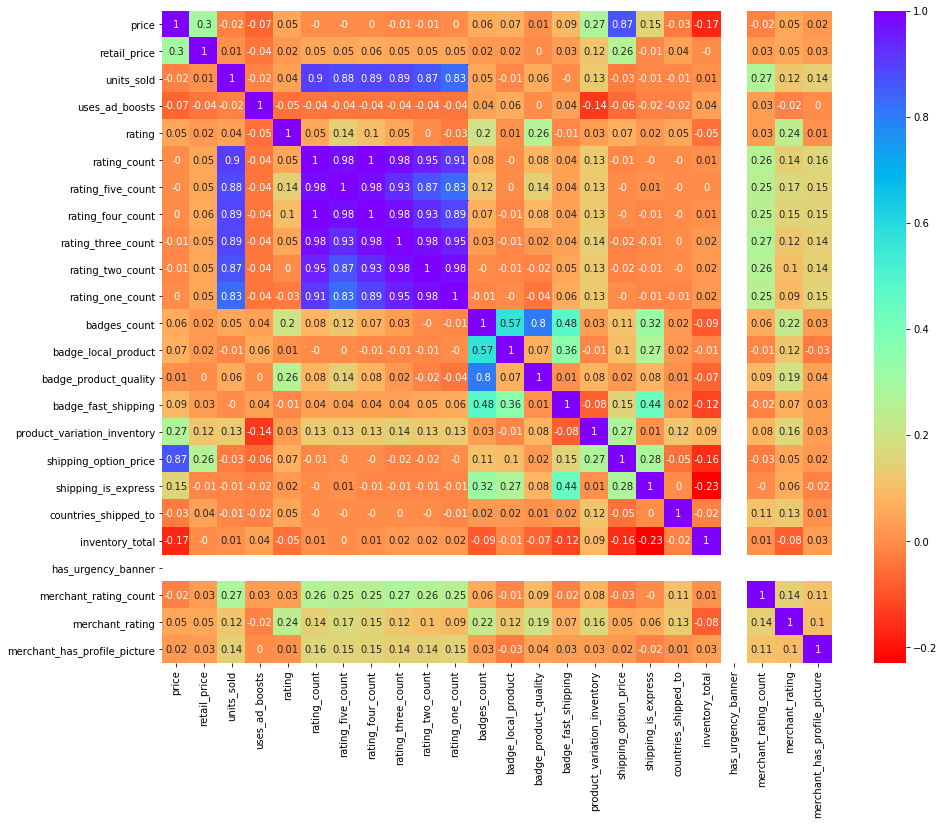

In [30]:
#Check correlation 
plt.figure(figsize=(15,12))
cor=round(num_data.corr(),2)
sns.heatmap(cor,annot=True,cmap='rainbow_r')

Interpretation: This graph tells about how the variables are correlated one among the others(strength and direction of pair variables).

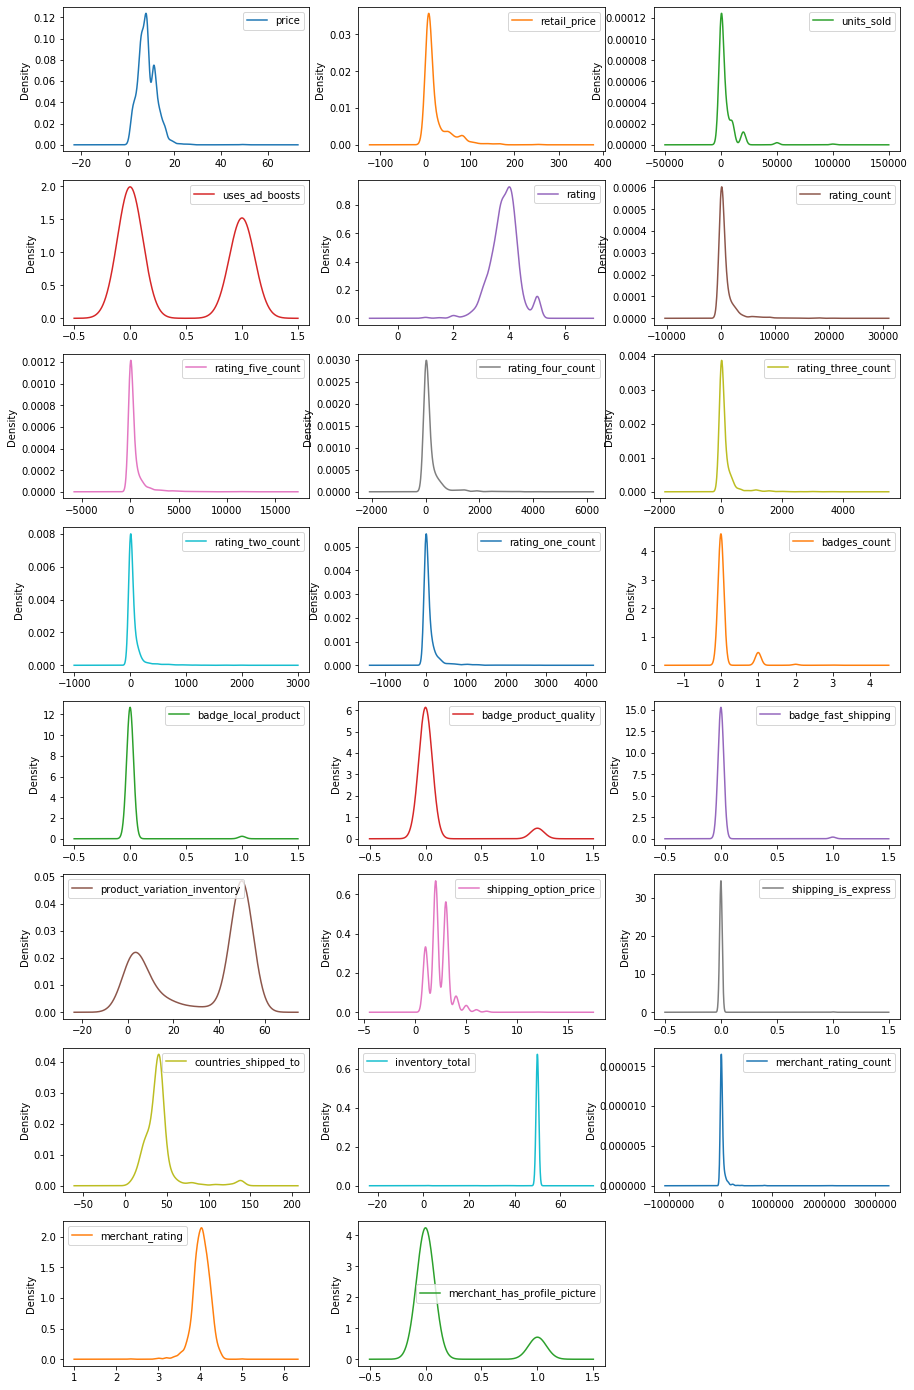

In [31]:
#Check the distribution of each features
dropped_has_urgency_banner=num_data.drop(columns=['has_urgency_banner'])
dropped_has_urgency_banner.plot(kind='kde',subplots=True,layout=(8,3),sharex=False,figsize=(15,25))
plt.show()

Interpretation: So many features are not normally distributed.

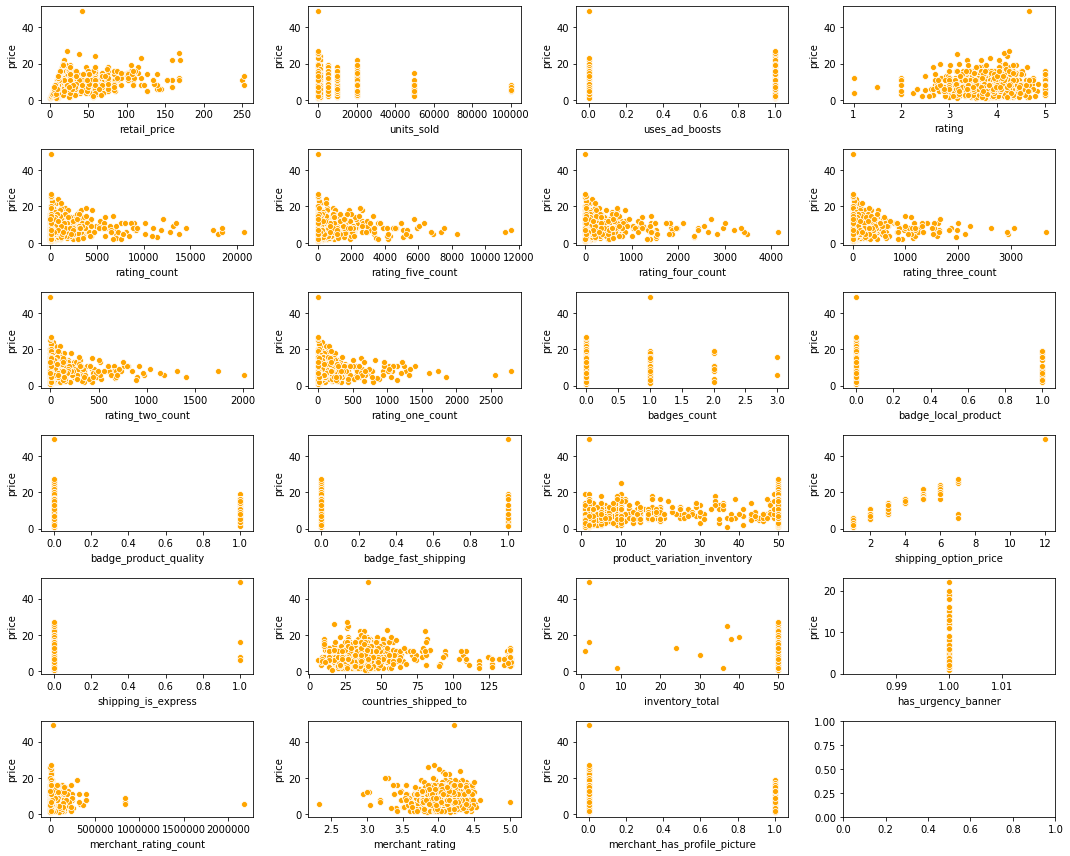

In [32]:
#Check the type of relation exist with the price
dropped_price=num_data.drop(columns=['price'])

fig, ax = plt.subplots(6, 4, figsize=(15, 12))
for variable, subplot in zip(dropped_price.columns, ax.flatten()):
    scttrplot = sns.scatterplot(x=variable, y='price', data=num_data, ax=subplot,color='orange')
    scttrplot.set_xlabel(variable, fontsize=10)
    

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show() 

Interpretation:Yes! some features are effecting the price and some features are not effecting.
     

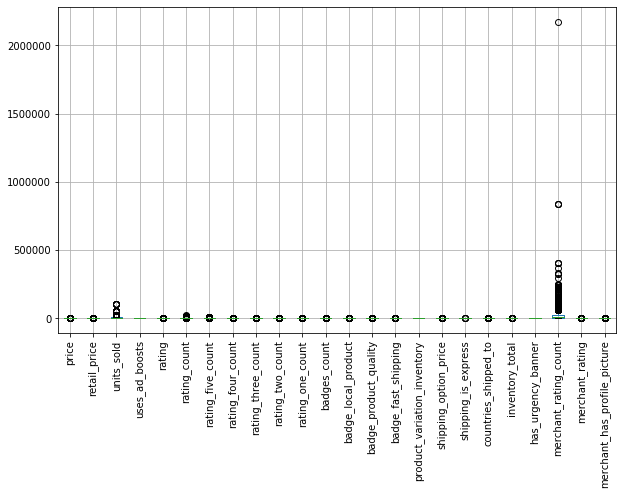

In [33]:
#Discover outliers
num_data.boxplot()
plt.xticks(rotation=90)
plt.show()

Interpretation:
    merchant_rating_count and units_sold have higher value so we can not visualize whole data properly so drop that features and analysis it.
    

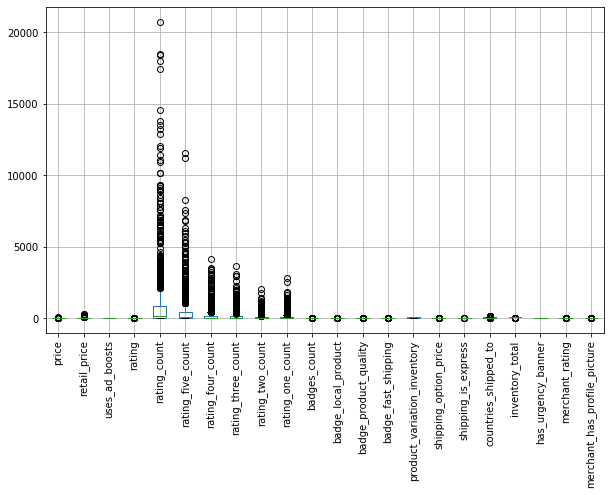

In [34]:
num_data2=num_data.drop(['merchant_rating_count','units_sold'],1)
num_data2.boxplot()
plt.xticks(rotation=90)
plt.show()

Interpretation:

    1)One product has a rating counts more than 20k.
    2)Two products has five_rating_counts more than 10k.

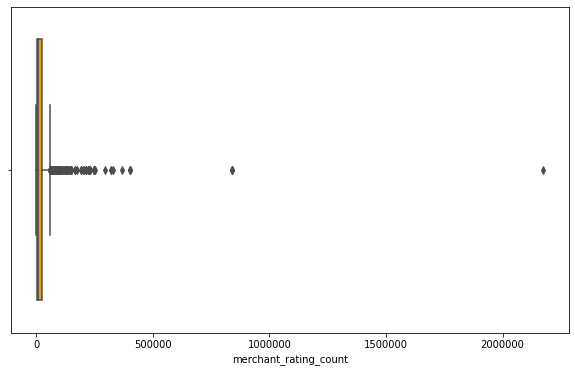

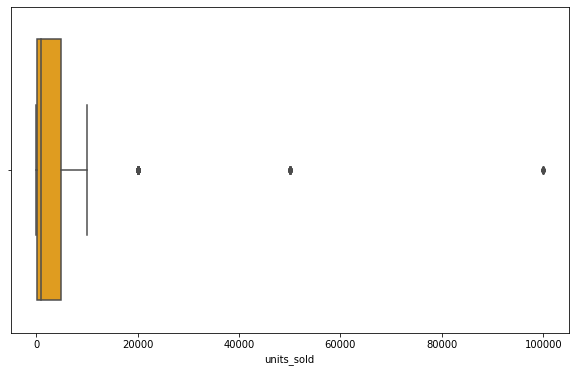

In [35]:
#Also check those features drop initially
for i in num_data[['merchant_rating_count','units_sold']].columns:
    sns.boxplot(num_data[i],color='orange')
    plt.show()

Interpetation:
    
    1) One merchant has rating counts of 20lacs[means high rated merchant].
    2) There is one product which sold maximum quantity[i.e 100000 units].
    

In [36]:
#numerical vs categorical anaylsis
df=pd.DataFrame(data.groupby(['product_id','title'])['units_sold'].max().head(5))
df.sort_values('units_sold',ascending=False)

units_sold
product_id               title                                                         
53897eeeafddf70c91af1cda T-shirt à manches courtes en mousseline de soie...      100000
544b079d1280fa28eee9b380 Femmes Camisole extensible Spaghetti Strap Long...      100000
53c8f05046188e57778ac77c S-XXL Mode Eté Printemps Femme Elastique Taille...       20000
54ab85ff509baf3e966f7f2a Été volant pare-soleil anneau de bain voiture g...       20000
535530635aefb0555ba4351f Bonne Qualité 2014 Été Vente Chaude Zipper Shor...        5000

Interpretation:
    These are the top5 products which sold maximum units.

### 4) Data Preparation 

#### 4.1) Data Processing and Wrangling

In [37]:
data.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [38]:
#Drop the above mentioned features
data1=data.drop(columns=['title','title_orig','currency_buyer','tags','merchant_title','merchant_name','merchant_id','merchant_info_subtitle','merchant_has_profile_picture','merchant_profile_picture','product_id','theme','crawl_month','product_url','product_picture'])
data1.head(2)

price  retail_price  units_sold  uses_ad_boosts  rating  rating_count  \
0   16.0            14         100               0    3.76            54   
1    8.0            22       20000               1    3.45          6135   

   rating_five_count  rating_four_count  rating_three_count  rating_two_count  \
0               26.0                8.0                10.0               1.0   
1             2269.0             1027.0              1118.0             644.0   

   rating_one_count  badges_count  badge_local_product  badge_product_quality  \
0               9.0             0                    0                      0   
1            1077.0             0                    0                      0   

   badge_fast_shipping product_color product_variation_size_id  \
0                    0         white                         M   
1                    0         green                        XS   

   product_variation_inventory shipping_option_name  shipping_option_price  \
0                           50   Livraison standard                      4   
1                           50   Livraison standard                      2   

   shipping_is_express  countries_shipped_to  inventory_total  \
0                    0                    34               50   
1                    0                    41               50   

   has_urgency_banner        urgency_text origin_country  \
0                 1.0  Quantité limitée !             CN   
1                 1.0  Quantité limitée !             CN   

   merchant_rating_count  merchant_rating  
0                    568         4.128521  
1                  17752         3.899673

In [39]:
#now check the shape
data1.shape

(1573, 28)

Interpretation: Features are reduce from 43 to 28  due to unique values. 

In [40]:
#drop the features which is having zero variance
var=data1.var()
var[var==0]

has_urgency_banner    0.0
dtype: float64

In [41]:
data1.drop(columns=['has_urgency_banner'],inplace=True)
data1.shape

(1573, 27)

In [42]:
data1.drop(columns=['badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping'],inplace=True)

data1.shape#check this

(1573, 23)

Interpretation:
    Now dataset is free of insignificant features.

#### 4.1.a) Missing value Treatment

In [43]:
#Check the missing value presence
no_missing_val=data1.isnull().sum()
missing_val_perc=data1.isnull().sum()*100/len(data1)
df=pd.concat([no_missing_val,missing_val_perc],1)
df.columns=['num_missing_val','missing_val_perc']
df

num_missing_val  missing_val_perc
price                                      0          0.000000
retail_price                               0          0.000000
units_sold                                 0          0.000000
uses_ad_boosts                             0          0.000000
rating                                     0          0.000000
rating_count                               0          0.000000
rating_five_count                         45          2.860776
rating_four_count                         45          2.860776
rating_three_count                        45          2.860776
rating_two_count                          45          2.860776
rating_one_count                          45          2.860776
product_color                             41          2.606484
product_variation_size_id                 14          0.890019
product_variation_inventory                0          0.000000
shipping_option_name                       0          0.000000
shipping_option_price                      0          0.000000
shipping_is_express                        0          0.000000
countries_shipped_to                       0          0.000000
inventory_total                            0          0.000000
urgency_text                            1100         69.930070
origin_country                            17          1.080737
merchant_rating_count                      0          0.000000
merchant_rating                            0          0.000000

Interpretation:
    Only one feature whose missing value is 69.93% so, drop this feature and all others having missing values will be treated. 

In [44]:
#drop this feature
data1.drop(columns=['urgency_text'],inplace=True)
data1.shape

(1573, 22)

In [45]:
data2=data1.copy()

In [46]:
data2['rating_five_count'].mode()

0    1.0
1    5.0
dtype: float64

In [47]:
#fill nan rows with the zero
data2['rating_five_count']=data2['rating_five_count'].fillna(0)
data2['rating_four_count']=data2['rating_four_count'].fillna(0)
data2['rating_three_count']=data2['rating_three_count'].fillna(0)
data2['rating_one_count']=data2['rating_one_count'].fillna(0)
data2['rating_two_count']=data2['rating_two_count'].fillna(0)

In [48]:
#fill nan row with the mode value
data2['product_color']=data2['product_color'].fillna(data2['product_color'].mode()[0])
data2['product_color'].isnull().any()

False

In [49]:
#fill nan row with the mode value
data2['product_variation_size_id']=data2['product_variation_size_id'].fillna(data2['product_variation_size_id'].mode()[0])
data2['product_variation_size_id'].isnull().any()

False

In [50]:
#fill nan row with the mode value
data2['origin_country']=data2['origin_country'].fillna(data2['origin_country'].mode()[0])
data2['origin_country'].isnull().any()

False

In [51]:
#Now check the presence of any nan values 
data2.isnull().sum().sum()

0

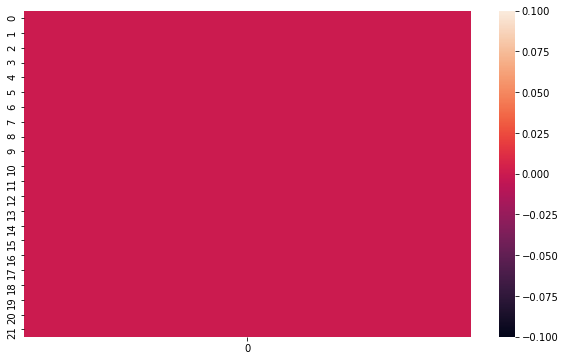

In [52]:
#check visually is there any null values
sns.heatmap(data2.isnull().sum().values.reshape(-1,1))

Interpretation:
    Fine!! all missing values are treated. Now dataset is free of missing values. 

In [53]:
#print shape
data2.shape

(1573, 22)

#### 4.1.b) Outlier Treatment

In [54]:
data2.reset_index(drop=True).head(2)

price  retail_price  units_sold  uses_ad_boosts  rating  rating_count  \
0   16.0            14         100               0    3.76            54   
1    8.0            22       20000               1    3.45          6135   

   rating_five_count  rating_four_count  rating_three_count  rating_two_count  \
0               26.0                8.0                10.0               1.0   
1             2269.0             1027.0              1118.0             644.0   

   rating_one_count product_color product_variation_size_id  \
0               9.0         white                         M   
1            1077.0         green                        XS   

   product_variation_inventory shipping_option_name  shipping_option_price  \
0                           50   Livraison standard                      4   
1                           50   Livraison standard                      2   

   shipping_is_express  countries_shipped_to  inventory_total origin_country  \
0                    0                    34               50             CN   
1                    0                    41               50             CN   

   merchant_rating_count  merchant_rating  
0                    568         4.128521  
1                  17752         3.899673

In [55]:
#split the data into categorical and numerical 
cat_data2=data2.select_dtypes(exclude=np.number)
num_data2=data2.select_dtypes(include=np.number)

In [56]:
#print categorical features
cat_data2.head(2)

product_color product_variation_size_id shipping_option_name origin_country
0         white                         M   Livraison standard             CN
1         green                        XS   Livraison standard             CN

In [57]:
#print numerical features
num_data2.head(2)

price  retail_price  units_sold  uses_ad_boosts  rating  rating_count  \
0   16.0            14         100               0    3.76            54   
1    8.0            22       20000               1    3.45          6135   

   rating_five_count  rating_four_count  rating_three_count  rating_two_count  \
0               26.0                8.0                10.0               1.0   
1             2269.0             1027.0              1118.0             644.0   

   rating_one_count  product_variation_inventory  shipping_option_price  \
0               9.0                           50                      4   
1            1077.0                           50                      2   

   shipping_is_express  countries_shipped_to  inventory_total  \
0                    0                    34               50   
1                    0                    41               50   

   merchant_rating_count  merchant_rating  
0                    568         4.128521  
1                  17752         3.899673

In [58]:
num_data2.shape

(1573, 18)

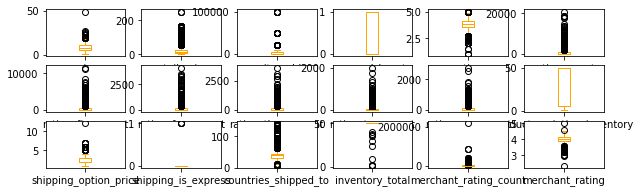

In [59]:
num_data2.plot(kind='box',subplots=True,layout=(6,6),sharex=False,color='orange')
plt.show()

In [60]:
#Capping

for i in num_data2.columns:
    q1 = num_data2[i].quantile(0.25)
    q3 = num_data2[i].quantile(0.75)
    iqr = q3-q1
    ub = q3+1.5*iqr
    lb = q1-1.5*iqr
    num_data2[i] = num_data2[i].replace(num_data2[num_data2[i]>ub][i],num_data2[i].quantile(0.85))
    num_data2[i] = num_data2[i].replace(num_data2[num_data2[i]<lb][i],num_data2[i].quantile(0.15))
    
    

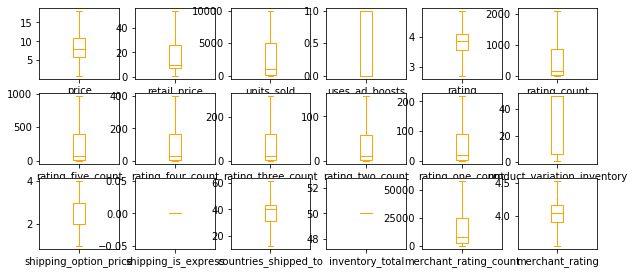

In [61]:
num_data2.plot(kind='box',subplots=True,layout=(4,6),sharex=False,color='orange')
plt.show()

Interpretation:
    Fine!! outlier treatment done with capping method.Now dataset is free of outliers.

#### 4.2) Feature Engineering

In [62]:
def encoding_prod_var(name):
    if name == 28 | 29 \
    or name == "Size -XXS" \
    or name == "SIZE-XXS":
        return "XXS"
    elif name == 30 | 31 \
    or name == "XS." \
    or name == "Size-XS" \
    or name == "SIZE XS":
        return "XS"
    elif name == 32 | 33 \
    or name == "S." \
    or name == "Suit-S" \
    or name == "Size S" \
    or name == "size S" \
    or name == "Size--S" \
    or name == "Size-S" \
    or name == "S Pink" \
    or name == "s":
        return "S"
    elif name == 34 \
    or name == "M." \
    or name == "Size M":
        return "M"
    elif name == 35 \
    or name == "L." \
    or name == "SizeL":
        return "L"
    elif name == 36 \
    or name == "X   L":
        return "XL"
    elif name == 37 \
    or name == "2XL":
        return "XXL"
    elif name == 'XXXS' \
    or name == 'XXS' \
    or name == 'XS' \
    or name == 'S' \
    or name == 'M' \
    or name == 'L' \
    or name == 'XL' \
    or name == 'XXL' \
    or name == 'XXXXL' \
    or name == 'XXXXXL':
        return name
    else:
        return "Other"
    
cat_data2['product_variation_size_id'] = cat_data2['product_variation_size_id'].replace(np.nan, "Other")
cat_data2['product_variation_size_id'] = cat_data2['product_variation_size_id'].apply(encoding_prod_var)

cat_data2["product_variation_size_id"].value_counts()

S         693
XS        369
M         206
XXS       104
Other     101
L          53
XXL        19
XL         18
XXXS        6
XXXXL       2
XXXXXL      2
Name: product_variation_size_id, dtype: int64

In [63]:
#Encoding product colors

def encoding_prod_color(name):
    if name == "armygreen" \
    or name == "khaki" \
    or name == "camouflage"\
    or name == "mintgreen" \
    or name == "lightgreen" \
    or name == "lightkhaki" \
    or name == "Army green" \
    or name == "army green" \
    or name == "darkgreen" \
    or name == "Green" \
    or name == "fluorescentgreen" \
    or name == "applegreen" \
    or name == "navy":
        return "green"
    
    elif name == "Black" \
    or name == "black & white" \
    or name == "black & blue" \
    or name == "coolblack" \
    or name == "black & green" \
    or name == "black & yellow":
        return "black"
    
    elif name == "navyblue" \
    or name == "lightblue" \
    or name == "skyblue" \
    or name == "Blue" \
    or name == "darkblue" \
    or name == "navy blue" \
    or name == "navyblue & white" \
    or name == "lakeblue":
        return "blue"
    
    elif name == "Yellow" \
    or name == "lightyellow" \
    or name == "star":
        return "yellow"
    
    elif name == "offwhite" \
    or name == "White" \
    or name == "whitefloral" \
    or name == "white & black" \
    or name == "white & green":
        return "white"
    
    elif name == "rosered" \
    or name == "rose" \
    or name == "Pink" \
    or name == "Rose" \
    or name == "pink & grey" \
    or name == "floral" \
    or name == "lightpink" \
    or name == "pink & white" \
    or name == "pink & black" \
    or name == "pink & blue" \
    or name == "dustypink":
        return "pink"
    
    elif name == "Red" \
    or name == "rouge" \
    or name == "lightred" \
    or name == "coralred" \
    or name == "watermelonred" \
    or name == "Rouge":
        return "red"
    
    elif name == "Orange" \
    or name == "orange-red" \
    or name == "apricot":
        return "orange"
    
    elif name == 'coffee':
        return "brown"
    
    elif name == "lightgrey" \
    or name == "gray" \
    or name == "Grey" \
    or name == "grey":
        return "grey"
    
    elif name == 'white' \
    or name == 'black' \
    or name == 'yellow' \
    or name == 'pink' \
    or name == 'red' \
    or name == 'green' \
    or name == 'orange' \
    or name == 'grey' \
    or name == 'brown' \
    or name == "purple" \
    or name == "blue" \
    or name == 'beige':
        return name
    
    else:
        return "other"
    
cat_data2['product_color'] = cat_data2['product_color'].replace(np.nan, "Other")
cat_data2['product_color'] = cat_data2['product_color'].apply(encoding_prod_color)
cat_data2['product_color'].value_counts().head(50)

black     359
white     272
blue      159
green     156
pink      133
yellow    108
red        99
other      91
grey       83
purple     53
orange     32
brown      14
beige      14
Name: product_color, dtype: int64

In [64]:
from sklearn.preprocessing import LabelEncoder
def encoder(value):
    encode = LabelEncoder().fit(value)
    return (encode.transform(value))



cat_data2['product_color'] = encoder(cat_data2['product_color'])
cat_data2['product_variation_size_id'] = encoder(cat_data2['product_variation_size_id'])

In [65]:
cat_data2.head(2)

product_color  product_variation_size_id shipping_option_name  \
0             11                          1   Livraison standard   
1              4                          5   Livraison standard   

  origin_country  
0             CN  
1             CN

In [66]:
cat_data2['product_color'].value_counts().head(5)

1     359
11    272
2     159
4     156
8     133
Name: product_color, dtype: int64

In [67]:
cat_data2['product_variation_size_id'].value_counts().head(5)     #3=S,5=XS,1=M,7=XXS,2=L

3    693
5    369
1    206
7    104
2    101
Name: product_variation_size_id, dtype: int64

In [68]:
cat_data2['Shipped_option'] = cat_data2['shipping_option_name'].apply(lambda x: 'Standard' if cat_data2['shipping_option_name'].any()=='Livraison standard' else 'Normal')
    
      

In [69]:
cat_data2.head(2)

product_color  product_variation_size_id shipping_option_name  \
0             11                          1   Livraison standard   
1              4                          5   Livraison standard   

  origin_country Shipped_option  
0             CN       Standard  
1             CN       Standard

In [70]:
#now drop shipping_option_name	

cat_data2.drop(columns=['shipping_option_name'],inplace=True)

In [71]:
cat_data2.head(2)

product_color  product_variation_size_id origin_country Shipped_option
0             11                          1             CN       Standard
1              4                          5             CN       Standard

In [72]:
cat_data2['origin_country'].value_counts()

CN    1533
US      31
VE       5
SG       2
AT       1
GB       1
Name: origin_country, dtype: int64

In [73]:
cat_data2['product_color'].value_counts().head(5)

1     359
11    272
2     159
4     156
8     133
Name: product_color, dtype: int64

In [74]:
cat_data2=pd.get_dummies(cat_data2,columns=['origin_country','Shipped_option'],drop_first=True)

In [75]:
cat_data2.head(2)

product_color  product_variation_size_id  origin_country_CN  \
0             11                          1                  1   
1              4                          5                  1   

   origin_country_GB  origin_country_SG  origin_country_US  origin_country_VE  
0                  0                  0                  0                  0  
1                  0                  0                  0                  0

In [76]:
#concatenate

num_two_col=pd.concat([num_data2,cat_data2.iloc[:,:2]],axis=1)
num_two_col.head(2)

price  retail_price  units_sold  uses_ad_boosts  rating  rating_count  \
0   16.0            14         100               0    3.76            54   
1    8.0            22       10000               1    3.45          1632   

   rating_five_count  rating_four_count  rating_three_count  rating_two_count  \
0               26.0                8.0                10.0               1.0   
1              771.4              323.2               238.6             110.2   

   rating_one_count  product_variation_inventory  shipping_option_price  \
0               9.0                           50                      4   
1             163.2                           50                      2   

   shipping_is_express  countries_shipped_to  inventory_total  \
0                    0                    34               50   
1                    0                    41               50   

   merchant_rating_count  merchant_rating  product_color  \
0                    568         4.128521             11   
1                  17752         3.899673              4   

   product_variation_size_id  
0                          1  
1                          5

In [77]:
#print shape 
num_two_col.shape

(1573, 20)

#### 4.3) Scaling and Feature Selection

In [78]:
from sklearn.preprocessing import StandardScaler       
sc=StandardScaler()
num_two_col_sc=sc.fit_transform(num_two_col.iloc[:,1:])
num_two_col_sc=pd.DataFrame(num_two_col_sc,columns=num_two_col.iloc[:,1:].columns)
num_two_col_sc.head(2)

retail_price  units_sold  uses_ad_boosts    rating  rating_count  \
0     -0.254203   -0.737270       -0.873758 -0.130381     -0.719914   
1      0.232839    1.861508        1.144482 -0.917524      1.821318   

   rating_five_count  rating_four_count  rating_three_count  rating_two_count  \
0          -0.715740          -0.729660           -0.688735         -0.774054   
1           1.845186           1.866404            1.848158          1.781168   

   rating_one_count  product_variation_inventory  shipping_option_price  \
0         -0.682884                     0.792577               2.102852   
1          1.765586                     0.792577              -0.318661   

   shipping_is_express  countries_shipped_to  inventory_total  \
0                  0.0             -0.331293              0.0   
1                  0.0              0.431540              0.0   

   merchant_rating_count  merchant_rating  product_color  \
0              -0.891689         0.494193       1.229477   
1               0.184642        -0.834319      -0.484816   

   product_variation_size_id  
0                  -1.366281  
1                   0.920668

In [79]:
#check Dimensions
num_two_col_sc.shape

(1573, 19)

In [80]:
#now concatenate scaled data with the cat_data2.iloc[:,2:]

final_data=pd.concat([num_two_col_sc,cat_data2.iloc[:,2:]],axis=1)
final_data.head(2)

retail_price  units_sold  uses_ad_boosts    rating  rating_count  \
0     -0.254203   -0.737270       -0.873758 -0.130381     -0.719914   
1      0.232839    1.861508        1.144482 -0.917524      1.821318   

   rating_five_count  rating_four_count  rating_three_count  rating_two_count  \
0          -0.715740          -0.729660           -0.688735         -0.774054   
1           1.845186           1.866404            1.848158          1.781168   

   rating_one_count  product_variation_inventory  shipping_option_price  \
0         -0.682884                     0.792577               2.102852   
1          1.765586                     0.792577              -0.318661   

   shipping_is_express  countries_shipped_to  inventory_total  \
0                  0.0             -0.331293              0.0   
1                  0.0              0.431540              0.0   

   merchant_rating_count  merchant_rating  product_color  \
0              -0.891689         0.494193       1.229477   
1               0.184642        -0.834319      -0.484816   

   product_variation_size_id  origin_country_CN  origin_country_GB  \
0                  -1.366281                  1                  0   
1                   0.920668                  1                  0   

   origin_country_SG  origin_country_US  origin_country_VE  
0                  0                  0                  0  
1                  0                  0                  0

In [81]:
final_data.shape

(1573, 24)

Interpretation:
    This is the final scaled dataset for model building...

### 5) Model Building

In [82]:
##Base model-1 using ols package

In [83]:
#Load the independent and dependent features
inp=final_data
out=num_two_col['price']

In [84]:
#Load required libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [85]:
#Split the dataset into train and test 
xtrain,xtest,ytrain,ytest= train_test_split(inp,out,test_size=.3,random_state=48)

In [86]:
#check the dimensions
print('Dimensions of x_train:',xtrain.shape)
print('Dimensions of y_train:',ytrain.shape)
print('Dimensions of x_test:',xtest.shape)
print('Dimensions of y_test:',ytest.shape)

Dimensions of x_train: (1101, 24)
Dimensions of y_train: (1101,)
Dimensions of x_test: (472, 24)
Dimensions of y_test: (472,)


In [87]:
#build a model using OLS method

import statsmodels.api as sm

inpc1=sm.add_constant(xtrain)
ols=sm.OLS(ytrain,inpc1)
linear_model_using_ols=ols.fit() 
print(linear_model_using_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     128.0
Date:                Sat, 10 Oct 2020   Prob (F-statistic):          4.34e-275
Time:                        10:35:33   Log-Likelihood:                -2262.0
No. Observations:                1101   AIC:                             4568.
Df Residuals:                    1079   BIC:                             4678.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

Interpretation:

    R_squared=0.714..              means 71.4% of varitation of price is explained by these features.
    Prob (F-statistic)= 4.34e-275  means constructed model is good
    skewness of residual=0.586     means error distribution is moderately normal distributed.
    Condition NUmber=9.65e+19      means Multicollinearity problem is exists(because greater than 1000).

In [88]:
#predict price for test data
from statsmodels.api import add_constant
xtest_with_constant=add_constant(xtest,has_constant='add')
ypred_ols=linear_model_using_ols.predict(xtest_with_constant)
ypred_ols.shape

(472,)

In [89]:
#check for ypred of test data

In [90]:
#find Performance
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
ols_rmse=rmse(ytest,ypred_ols)
#r2_score
ols_r2=r2_score(ytest,ypred_ols)
#adj_r2_score
ols_adj_r2=1-(((1-ols_r2)*(len(xtest)-1))/(len(xtest)-len(xtest.columns)-1))

print('rmse:',ols_rmse,'\n','r2_score:',ols_r2,'\n','adj_r2:',ols_adj_r2)

rmse: 2.0082474756080084 
 r2_score: 0.6819569210321146 
 adj_r2: 0.6648807825640402


In [91]:
score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared', 'RMSE'])

linreg_full_base_model_using_ols = pd.Series({
                     'Model_Name': "LRM_using _OLS",
                     'RMSE':ols_rmse,
                     'R-Squared':ols_r2 ,
                     'Adj. R-Squared': ols_adj_r2    
                   })

score_card = score_card.append(linreg_full_base_model_using_ols , ignore_index=True)

#call scorecard
score_card

Model_Name  R-Squared  Adj. R-Squared      RMSE
0  LRM_using _OLS   0.681957        0.664881  2.008247

In [92]:
##Base model-2 using sklearn package

In [93]:
Lr=LinearRegression()
Lr.fit(xtrain,ytrain) 
ypred=Lr.predict(xtest)
print('predicted values:',ypred,'\n')
intercept=Lr.intercept_
print('Intercept:',intercept,'\n')
Coeff=Lr.coef_
print('Coefficents :',Coeff)

predicted values: [10.30701353 10.49585523 10.81071205  7.79301005  7.09303118 10.89130316
 10.40007063  8.48072338  4.40689781  3.11669705  7.44353595  6.96429604
 11.64049132  8.10006415  3.43067909  7.64892243 10.11592347  7.90964482
  7.38306902  7.47996649  7.59866759 15.02942016 10.54756716 11.29240993
  3.5477461  10.79316838  6.93563797  7.10713328 10.49207365 10.45272631
  7.99523293  7.3577197   4.20689272 10.59437678 10.57702947  7.89235363
 10.77290637  4.03570201  3.11938721  7.15412905  3.33688782 10.33991886
  7.79822832  6.81884176 10.23187883  7.61120635  7.81387092  7.28930234
 10.77233642  3.33996144  7.29311956 11.89801475 11.29505531 10.79231294
  3.37019454 11.1230622  11.13288131  7.45296958 10.46000461 11.79027598
 10.69574321  7.29426282  3.14102385  3.01190537  9.9424317   3.53556264
  3.01190537 14.68741289  7.69183045 10.18826365  6.77028926 10.98467477
  7.64427908 11.13086038  9.91257438  7.34114938 11.63062185  6.5705652
 11.16741364 14.72771096 10.862301

In [94]:
#find Performance
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
lr_rmse=rmse(ytest,ypred)
#r2_score
lr_r2=r2_score(ytest,ypred)
#adj_r2_score
lr_adj_r2=1-(((1-lr_r2)*(len(xtest)-1))/(len(xtest)-len(xtest.columns)-1))

print('rmse:',lr_rmse,'\n','r2_score:',lr_r2,'\n','adj_r2:',lr_adj_r2)

rmse: 2.008247475608013 
 r2_score: 0.6819569210321133 
 adj_r2: 0.6648807825640388


In [95]:
linreg_full_base_model_using_sklearn = pd.Series({
                     'Model_Name': "LRM_using_sklearn ",
                     'RMSE':lr_rmse,
                     'R-Squared':lr_r2 ,
                     'Adj. R-Squared': lr_adj_r2     
                   })

score_card = score_card.append(linreg_full_base_model_using_sklearn , ignore_index=True)

#call scorecard
score_card

Model_Name  R-Squared  Adj. R-Squared      RMSE
0      LRM_using _OLS   0.681957        0.664881  2.008247
1  LRM_using_sklearn    0.681957        0.664881  2.008247

Interpretation:
    Both sklearn and OLS package are giving the same result.

In [96]:
#model-3 output transformation model

In [97]:
# Build a model with the output transformation


#As we know that dependent variable is not normal distributed so transform it
import scipy.stats as stats
box_out,lam=stats.boxcox(num_two_col['price'])
box_out=pd.DataFrame(box_out)
print('skewness of price:',box_out.skew()[0])    #equal to zero so normal distributed now



skewness of price: -0.051788153243817726


In [98]:
#split the  input and output variables 
xtrain,xtest,ytrain,ytest= train_test_split(inp,box_out,test_size=.3,random_state=48)


#build a model using Sklearn package
Lr=LinearRegression()
Lr.fit(xtrain,ytrain) 
ypred=Lr.predict(xtest)
print('predicted values:',ypred,'\n')
intercept=Lr.intercept_
print('Intercept:',intercept,'\n')
Coeff=Lr.coef_
print('Coefficents :',Coeff)
#check

predicted values: [[5.58141855]
 [5.69524939]
 [5.76072452]
 [4.25407636]
 [3.94412912]
 [5.84296223]
 [5.60374914]
 [4.64797081]
 [2.57779398]
 [1.85092613]
 [4.1279848 ]
 [3.63571263]
 [6.28838157]
 [4.45293056]
 [2.02141336]
 [4.21127749]
 [5.42274567]
 [4.37809876]
 [4.11271459]
 [4.16358914]
 [4.23523496]
 [7.92240683]
 [5.71961996]
 [6.0854296 ]
 [2.09423252]
 [5.83582134]
 [3.89386761]
 [3.95062008]
 [5.66572823]
 [5.69446476]
 [4.40509464]
 [4.07806286]
 [2.39078906]
 [5.79117254]
 [5.68425293]
 [4.29920141]
 [5.77933585]
 [2.43022884]
 [1.85283062]
 [3.91425928]
 [1.99051294]
 [5.54073234]
 [4.28228065]
 [3.83062789]
 [5.5281131 ]
 [4.13342771]
 [4.26769217]
 [4.07802795]
 [5.79625106]
 [2.0187044 ]
 [4.0974879 ]
 [6.33854769]
 [6.08823309]
 [5.82015202]
 [2.06230927]
 [5.99942108]
 [5.95013601]
 [4.06118261]
 [5.59769829]
 [6.25035483]
 [5.736295  ]
 [4.07822875]
 [1.84191439]
 [1.82614797]
 [5.47505785]
 [2.0808948 ]
 [1.82614797]
 [7.7617145 ]
 [4.23447836]
 [5.51362782]
 [

In [99]:
#find performance
#rmse
lr_box_cox_rmse=rmse(ytest,ypred)
#r2_score
lr_box_cox_r2=r2_score(ytest,ypred)
#adj_r2_score
lr_box_cox_adj_r2=1-(((1-lr_box_cox_r2)*(len(xtest)-1))/(len(xtest)-len(xtest.columns)-1))

print('rmse:',lr_box_cox_rmse,'\n','r2_score:',lr_box_cox_r2,'\n','adj_r2:',lr_box_cox_adj_r2)

rmse: [0.99589621] 
 r2_score: 0.7030599294891123 
 adj_r2: 0.6871168384549706


In [100]:
linreg_full_model_with_transformed_price = pd.Series({
                     'Model_Name': "LRM_full_with_transformed_price",
                     'RMSE':lr_box_cox_rmse,
                     'R-Squared':lr_box_cox_r2 ,
                     'Adj. R-Squared': lr_box_cox_adj_r2     
                   })

score_card = score_card.append(linreg_full_model_with_transformed_price, ignore_index=True)

#call scorecard
score_card

Model_Name  R-Squared  Adj. R-Squared  \
0                   LRM_using _OLS   0.681957        0.664881   
1               LRM_using_sklearn    0.681957        0.664881   
2  LRM_full_with_transformed_price   0.703060        0.687117   

                  RMSE  
0              2.00825  
1              2.00825  
2  [0.995896209383591]

### 5.1) Assumptions

#### 5.1.a) Multicolinearity

In [101]:
#import library
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]          #dataframe to np array
vif['features']=xtrain.columns
vif.sort_values('VIF',ascending=False)

VIF                     features
4   141.598106                 rating_count
6   101.476976            rating_four_count
7    75.748114           rating_three_count
5    63.101883            rating_five_count
8    40.189399             rating_two_count
9    21.840174             rating_one_count
1     7.784385                   units_sold
3     1.390484                       rating
10    1.313381  product_variation_inventory
18    1.296218    product_variation_size_id
11    1.285954        shipping_option_price
15    1.242100        merchant_rating_count
16    1.155498              merchant_rating
0     1.140962                 retail_price
13    1.134973         countries_shipped_to
2     1.062906               uses_ad_boosts
17    1.037817                product_color
21    1.022940            origin_country_SG
22    1.019717            origin_country_US
23    1.013241            origin_country_VE
19    1.002930            origin_country_CN
12         NaN          shipping_is_express
14         NaN              inventory_total
20         NaN            origin_country_GB

Interpretation:
    rating_count  has VIF value more than 15 so, drop this one by one.

In [102]:
inpv1=xtrain.drop(['rating_count','rating_four_count','rating_three_count','rating_two_count'],1)
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inpv1.values,i) for i in range(inpv1.shape[1])]          
vif['features']=inpv1.columns
vif.sort_values('VIF',ascending=False)

VIF                     features
4   10.405141            rating_five_count
1    7.510223                   units_sold
5    6.914656             rating_one_count
3    1.376234                       rating
6    1.311237  product_variation_inventory
14   1.292593    product_variation_size_id
7    1.271701        shipping_option_price
11   1.235828        merchant_rating_count
12   1.153761              merchant_rating
0    1.137516                 retail_price
9    1.129932         countries_shipped_to
2    1.050583               uses_ad_boosts
13   1.036612                product_color
17   1.018434            origin_country_SG
18   1.017644            origin_country_US
19   1.012911            origin_country_VE
15   1.002270            origin_country_CN
8         NaN          shipping_is_express
10        NaN              inventory_total
16        NaN            origin_country_GB

Interpretation:
    All features whose VIF value is less than 15 so, now free of multicollinearity.

In [103]:
#model=4 significant features with transformed output# check

In [104]:
#inp=inpv1             have only signficant features   (these two are train set)
#out=ytrain           transformed output

In [105]:
#Build a model 
import statsmodels.api as sm

inpc1=sm.add_constant(inpv1)
ols=sm.OLS(ytrain,inpc1)
linear_model_using_ols=ols.fit() 
print(linear_model_using_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     168.1
Date:                Sat, 10 Oct 2020   Prob (F-statistic):          3.95e-289
Time:                        10:35:36   Log-Likelihood:                -1493.7
No. Observations:                1101   AIC:                             3023.
Df Residuals:                    1083   BIC:                             3114.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [106]:
#predict price for test data

sign_feat=list(inpv1.columns)  #bcoz VIF done to train set so we consider the same features to test also


from statsmodels.api import add_constant
xtest_with_constant=add_constant(xtest[sign_feat],has_constant='add')
ypred_ols=linear_model_using_ols.predict(xtest_with_constant)
ypred_ols.shape
#check

(472,)

In [107]:
#find Performance
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
ols_rmse=np.sqrt(mean_squared_error(ytest,ypred_ols))
#r2_score
ols_r2=r2_score(ytest,ypred_ols)
#adj_r2_score
ols_adj_r2=1-(((1-ols_r2)*(len(xtest[sign_feat])-1))/(len(xtest[sign_feat])-len(xtest[sign_feat].columns)-1))

print('rmse:',ols_rmse,'\n','r2_score:',ols_r2,'\n','adj_r2:',ols_adj_r2)

rmse: 0.9862221515556382 
 r2_score: 0.708800815348465 
 adj_r2: 0.6958873260069334


In [108]:
linreg_model_with_signifi_feat = pd.Series({
                     'Model_Name': "LRM_with_Signf_feat",
                     'RMSE':ols_rmse,
                     'R-Squared':ols_r2 ,
                     'Adj. R-Squared': ols_adj_r2     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat, ignore_index=True)

#call scorecard
score_card

Model_Name  R-Squared  Adj. R-Squared  \
0                   LRM_using _OLS   0.681957        0.664881   
1               LRM_using_sklearn    0.681957        0.664881   
2  LRM_full_with_transformed_price   0.703060        0.687117   
3              LRM_with_Signf_feat   0.708801        0.695887   

                  RMSE  
0              2.00825  
1              2.00825  
2  [0.995896209383591]  
3             0.986222

#### 5.1.b) Autocollinearity

Interpretation:

Durbin-Watson: 2.043 
This value is lies in the accepted range(i.e 1.5 to 2.5) so, model is free of autocollinearity.   

#### 5.1.c) Linearity

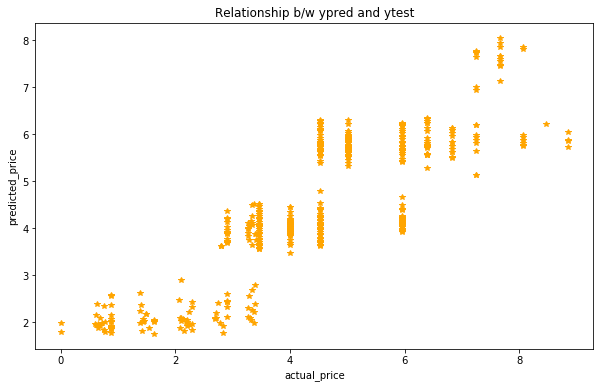

In [109]:
#Check the relationship b/w ypredict and ytest
plt.plot(ytest,ypred_ols,'*',color='orange')
plt.title('Relationship b/w ypred and ytest')
plt.xlabel('actual_price')
plt.ylabel('predicted_price')
plt.show()


In [110]:
#Statistical test to check the linearity
from statsmodels.stats.diagnostic import linear_rainbow 
print('% of Linearity:',linear_rainbow(res=linear_model_using_ols,frac=0.5)[1]*100)

% of Linearity: 81.46693539869712


Interpretation:
    Linearity assumption also satisfied.

#### 5.1.d) Normality

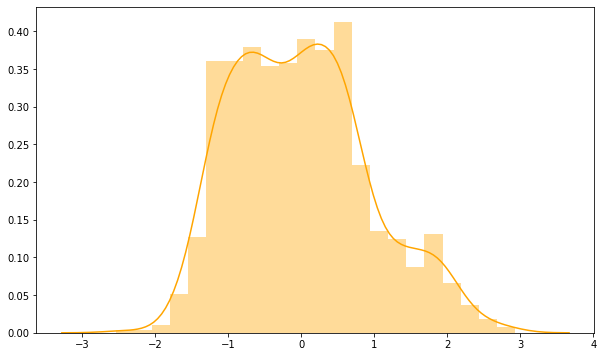

In [111]:
#plot the distribution of residual
sns.distplot(linear_model_using_ols.resid,color='orange')
plt.show()

In [112]:
#Check skewness
print('Skewness of residual is :',linear_model_using_ols.resid.skew())

Skewness of residual is : 0.4640051704120261


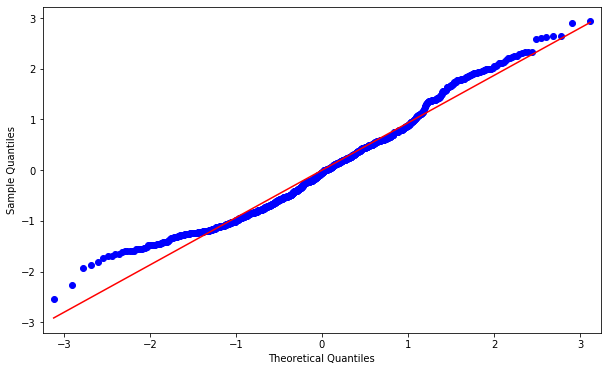

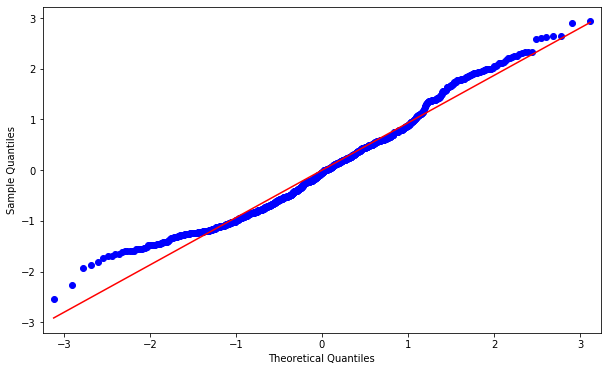

In [113]:
#Using qqplot
from statsmodels.graphics.gofplots import qqplot
qqplot(linear_model_using_ols.resid,line='r')   #r=regression line
#check

Interpretation:
    From the above graphs we can say that residual are  not fully(modrerately) normal distributed.

#### 5.1.e) Homscadasticity

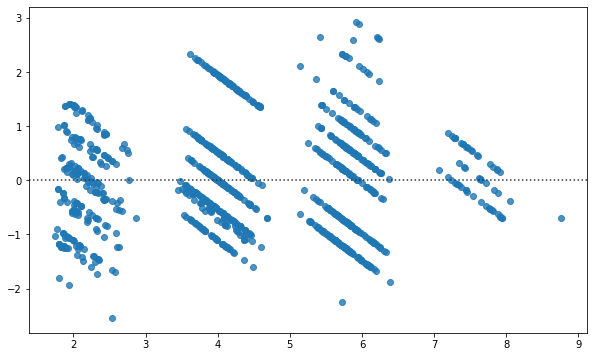

In [114]:
#Find the Homascadasticity
sns.residplot(linear_model_using_ols.predict(),linear_model_using_ols.resid)
plt.show()

In [115]:
#statsitic test for homascadsticity
from statsmodels.stats.api import het_goldfeldquandt

#H0: model is homascadsticity
print('Pvalue is :',het_goldfeldquandt(linear_model_using_ols.resid,linear_model_using_ols.model.exog)[1])

Pvalue is : 0.4144214573594527


Interpretation:
In the above graph there is no funnel shape and eventhough pvalue is greater than 0.05 so, this model is free of Heteroscadsticity.
    

Interpretation:
    
    All assumptions are satisfied.

### 6) Feature selection


In [116]:
inpv1.head(2)

retail_price  units_sold  uses_ad_boosts    rating  rating_five_count  \
121      -0.741244    -0.73727       -0.873758  1.088421          -0.798195   
1026      1.937483    -0.73727       -0.873758 -0.562040          -0.722611   

      rating_one_count  product_variation_inventory  shipping_option_price  \
121          -0.825791                     0.792577              -0.318661   
1026         -0.635248                     0.792577               0.892096   

      shipping_is_express  countries_shipped_to  inventory_total  \
121                   0.0              0.431540              0.0   
1026                  0.0              0.758468              0.0   

      merchant_rating_count  merchant_rating  product_color  \
121               -0.319513        -0.421815      -1.219513   
1026              -0.598805        -0.171088       1.229477   

      product_variation_size_id  origin_country_CN  origin_country_GB  \
121                   -0.222807                  1                  0   
1026                  -0.222807                  1                  0   

      origin_country_SG  origin_country_US  origin_country_VE  
121                   0                  0                  0  
1026                  0                  0                  0

In [117]:
inpv_1=inpv1.copy()

In [118]:
#import library
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

#### 6.1.a) Backward elimination method

In [119]:
lr=LinearRegression()
lr_back=sfs(estimator=lr,k_features='best',forward=False) #k_features='best' gives significant features among all the features
sfs_back=lr_back.fit(inpv_1,ytrain)
back_feat=sfs_back.k_feature_names_
back_feat=list(back_feat)
print('These are the significant features for best model by considering backward_elimin :','\n',back_feat)

These are the significant features for best model by considering backward_elimin : 
 ['retail_price', 'product_variation_inventory', 'shipping_option_price', 'product_variation_size_id']


In [120]:
#Check score
print('Score of backward elimination :',sfs_back.k_score_)

Score of backward elimination : 0.716323842766674


#### 6.1.b) Forward selection method

In [121]:
lr=LinearRegression()
lr_forw=sfs(estimator=lr,k_features='best',forward=True)   
sfs_forw=lr_forw.fit(inpv_1,ytrain)
forw_feat=sfs_forw.k_feature_names_
forw_feat=list(forw_feat)
print('These are the significant features for best model by considering forward_selec :','\n',forw_feat)

These are the significant features for best model by considering forward_selec : 
 ['retail_price', 'product_variation_inventory', 'shipping_option_price', 'shipping_is_express', 'inventory_total', 'product_variation_size_id']


In [122]:
#Check score
print('Score of forward selection :',sfs_forw.k_score_)

Score of forward selection : 0.7163238427666742


#### 6.1.c) RFE-Recursive feature elimination

In [123]:
lr=LinearRegression()
from sklearn.feature_selection import RFECV       #its gives possible features so thats why we dont need to write n_features_to_select
rfe_mod=RFECV(estimator=lr)
rfe_feat=rfe_mod.fit(inpv_1,ytrain)

rank=pd.DataFrame()
rank['Rank']=rfe_feat.ranking_
rank['Feature']=inpv_1.columns

r_feat=rank[rank['Rank']==1]

In [124]:
#print features
rfe_featu=r_feat['Feature']
print('These are the significant features for best model by considering RFE :','\n',rfe_featu)

These are the significant features for best model by considering RFE : 
 0                    retail_price
1                      units_sold
4               rating_five_count
6     product_variation_inventory
7           shipping_option_price
14      product_variation_size_id
15              origin_country_CN
17              origin_country_SG
18              origin_country_US
19              origin_country_VE
Name: Feature, dtype: object


In [125]:
#Check score
print('Score of RFECV method :',np.mean(rfe_feat.grid_scores_))

Score of RFECV method : 0.702568523586466


Interpretation:

    From the above three results forward and backward methos are giving best result so, conisder any one method to build a model(RFECV gives less score).

In [126]:
#model-5 model with best features using backward elimination


In [127]:
import statsmodels.api as sm

inpc2=sm.add_constant(inpv_1[back_feat])
ols=sm.OLS(ytrain,inpc2)
linear_model_using_ols_best_feat=ols.fit() 
print(linear_model_using_ols_best_feat.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     711.5
Date:                Sat, 10 Oct 2020   Prob (F-statistic):          8.95e-303
Time:                        10:35:56   Log-Likelihood:                -1500.1
No. Observations:                1101   AIC:                             3010.
Df Residuals:                    1096   BIC:                             3035.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [128]:
sign_feat=list(inpv_1[back_feat].columns)  #bcoz we need to consider only best features obtained from backward elimination


from statsmodels.api import add_constant
xtest_with_constant=add_constant(xtest[sign_feat],has_constant='add')
ypred_ols=linear_model_using_ols_best_feat.predict(xtest_with_constant)
ypred_ols.shape

(472,)

In [129]:
#find Performance
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
ols_rmse=np.sqrt(mean_squared_error(ytest,ypred_ols))
#r2_score
ols_r2=r2_score(ytest,ypred_ols)
#adj_r2_score
ols_adj_r2=1-(((1-ols_r2)*(len(xtest[sign_feat])-1))/(len(xtest[sign_feat])-len(xtest[sign_feat].columns)-1))

print('rmse:',ols_rmse,'\n','r2_score:',ols_r2,'\n','adj_r2:',ols_adj_r2)

rmse: 0.9902278461522318 
 r2_score: 0.7064305098999124 
 adj_r2: 0.7039159960660787


In [130]:
linreg_model_with_signifi_feat_using_backward_elimin = pd.Series({
                     'Model_Name': "LRM_signif_feat_using_backward_elimin",
                     'RMSE':ols_rmse,
                     'R-Squared':ols_r2 ,
                     'Adj. R-Squared': ols_adj_r2     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_using_backward_elimin, ignore_index=True)

#call scorecard
score_card

Model_Name  R-Squared  Adj. R-Squared  \
0                         LRM_using _OLS   0.681957        0.664881   
1                     LRM_using_sklearn    0.681957        0.664881   
2        LRM_full_with_transformed_price   0.703060        0.687117   
3                    LRM_with_Signf_feat   0.708801        0.695887   
4  LRM_signif_feat_using_backward_elimin   0.706431        0.703916   

                  RMSE  
0              2.00825  
1              2.00825  
2  [0.995896209383591]  
3             0.986222  
4             0.990228

In [131]:
#model-6 model with best features using RFE method

In [132]:
#Build a model
inpc3=sm.add_constant(inpv_1[rfe_featu])
ols=sm.OLS(ytrain,inpc3)
linear_model_using_ols_best_feat_RFE=ols.fit() 
print(linear_model_using_ols_best_feat_RFE.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     285.4
Date:                Sat, 10 Oct 2020   Prob (F-statistic):          4.06e-296
Time:                        10:35:57   Log-Likelihood:                -1496.8
No. Observations:                1101   AIC:                             3016.
Df Residuals:                    1090   BIC:                             3071.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [133]:
sign_feat=list(inpv_1[rfe_featu].columns)  #bcoz we need to consider only best features obtained from RFE method


from statsmodels.api import add_constant
xtest_with_constant=add_constant(xtest[sign_feat],has_constant='add')
ypred_ols=linear_model_using_ols_best_feat_RFE.predict(xtest_with_constant)
ypred_ols.shape

(472,)

In [134]:
#find Performance
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
ols_rmse=np.sqrt(mean_squared_error(ytest,ypred_ols))
#r2_score
ols_r2=r2_score(ytest,ypred_ols)
#adj_r2_score
ols_adj_r2=1-(((1-ols_r2)*(len(xtest[sign_feat])-1))/(len(xtest[sign_feat])-len(xtest[sign_feat].columns)-1))

print('rmse:',ols_rmse,'\n','r2_score:',ols_r2,'\n','adj_r2:',ols_adj_r2)

rmse: 0.989431905311466 
 r2_score: 0.7069022599898507 
 adj_r2: 0.7005443914429927


In [135]:
linreg_model_with_signifi_feat_using_RFECV_method = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_using_RFECV",
                     'RMSE':ols_rmse,
                     'R-Squared':ols_r2 ,
                     'Adj. R-Squared': ols_adj_r2     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_using_RFECV_method , ignore_index=True)

#call scorecard
score_card

Model_Name  R-Squared  Adj. R-Squared  \
0                         LRM_using _OLS   0.681957        0.664881   
1                     LRM_using_sklearn    0.681957        0.664881   
2        LRM_full_with_transformed_price   0.703060        0.687117   
3                    LRM_with_Signf_feat   0.708801        0.695887   
4  LRM_signif_feat_using_backward_elimin   0.706431        0.703916   
5       LRM_with_signif_feat_using_RFECV   0.706902        0.700544   

                  RMSE  
0              2.00825  
1              2.00825  
2  [0.995896209383591]  
3             0.986222  
4             0.990228  
5             0.989432

#### 6.2) Interaction effect  (Joint effect)

#### 6.2.a) Interaction effect with backward elimination

In [136]:
inpv_1_back=inpv_1[back_feat]
inpv_1_back.head(2)

retail_price  product_variation_inventory  shipping_option_price  \
121      -0.741244                     0.792577              -0.318661   
1026      1.937483                     0.792577               0.892096   

      product_variation_size_id  
121                   -0.222807  
1026                  -0.222807

In [137]:
#concatenate ytrain and inpv_1_back[back_feat]
inpv_1_back=pd.concat([inpv_1_back,ytrain],axis=1)
inpv_1_back.rename({0: 'price'}, axis=1, inplace=True)
inpv_1_back.head(2)
#check

retail_price  product_variation_inventory  shipping_option_price  \
121      -0.741244                     0.792577              -0.318661   
1026      1.937483                     0.792577               0.892096   

      product_variation_size_id     price  
121                   -0.222807  4.002673  
1026                  -0.222807  6.391419

In [138]:
#bring to one scale form
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
inpv_1_back['price']=sc.fit_transform(inpv_1_back['price'].values.reshape(-1,1))
inpv_1_back.head(2)

retail_price  product_variation_inventory  shipping_option_price  \
121      -0.741244                     0.792577              -0.318661   
1026      1.937483                     0.792577               0.892096   

      product_variation_size_id     price  
121                   -0.222807 -0.272825  
1026                  -0.222807  1.059869

In [139]:
##add one column--> price difference[retail_price-price]
inpv_1_back['price_diff']=inpv_1_back['retail_price']-inpv_1_back['price']

#now drop price feature
inpv_1_back.drop(columns=['price','retail_price'],inplace=True)
inpv_1_back.head(2)


product_variation_inventory  shipping_option_price  \
121                      0.792577              -0.318661   
1026                     0.792577               0.892096   

      product_variation_size_id  price_diff  
121                   -0.222807   -0.468419  
1026                  -0.222807    0.877614

In [140]:
#model-7 interaction effect of price difference with backward elimination(retail_price-price)

In [141]:
#Build a model 
import statsmodels.api as sm

inpc4=sm.add_constant(inpv_1_back)
ols=sm.OLS(ytrain,inpc4)
linear_model_using_ols_best_feat_backward_with_interaction=ols.fit() 
print(linear_model_using_ols_best_feat_backward_with_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     848.7
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:35:58   Log-Likelihood:                -1428.4
No. Observations:                1101   AIC:                             2867.
Df Residuals:                    1096   BIC:                             2892.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [142]:
#same we need for test also#check
xtest[back_feat].head(2)

retail_price  product_variation_inventory  shipping_option_price  \
472     -0.436843                    -0.191198               0.892096   
952     -0.619484                     0.792577               0.892096   

     product_variation_size_id  
472                  -0.222807  
952                  -0.222807

In [143]:
#concatenate
xtest_backward=pd.concat([xtest[back_feat],ytest],axis=1)
xtest_backward.rename({0: 'price'}, axis=1, inplace=True)
xtest_backward.head(2)

retail_price  product_variation_inventory  shipping_option_price  \
472     -0.436843                    -0.191198               0.892096   
952     -0.619484                     0.792577               0.892096   

     product_variation_size_id     price  
472                  -0.222807  6.391419  
952                  -0.222807  5.009909

In [144]:
#bring to one scale form
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtest_backward['price']=sc.fit_transform(xtest_backward['price'].values.reshape(-1,1))
xtest_backward.head(2)

retail_price  product_variation_inventory  shipping_option_price  \
472     -0.436843                    -0.191198               0.892096   
952     -0.619484                     0.792577               0.892096   

     product_variation_size_id     price  
472                  -0.222807  1.064689  
952                  -0.222807  0.308771

In [145]:
##add one column--> price difference[retail_price-price]
xtest_backward['price_diff']=xtest_backward['retail_price']-xtest_backward['price']

#now drop price and retail price features
xtest_backward.drop(columns=['price','retail_price'],inplace=True)
xtest_backward.head(2)

product_variation_inventory  shipping_option_price  \
472                    -0.191198               0.892096   
952                     0.792577               0.892096   

     product_variation_size_id  price_diff  
472                  -0.222807   -1.501532  
952                  -0.222807   -0.928255

In [146]:
from statsmodels.api import add_constant
xtest_with_constant=add_constant(xtest_backward,has_constant='add')
ypred_ols=linear_model_using_ols_best_feat_backward_with_interaction.predict(xtest_with_constant)
ypred_ols.shape

(472,)

In [147]:
#find Performance
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
ols_rmse=np.sqrt(mean_squared_error(ytest,ypred_ols))
#r2_score
ols_r2=r2_score(ytest,ypred_ols)
#adj_r2_score
ols_adj_r2=1-(((1-ols_r2)*(len(xtest_backward)-1))/(len(xtest_backward)-len(xtest_backward.columns)-1))

print('rmse:',ols_rmse,'\n','r2_score:',ols_r2,'\n','adj_r2:',ols_adj_r2)

rmse: 0.9242432744301422 
 r2_score: 0.7442514108641898 
 adj_r2: 0.7420608447902214


In [148]:
linreg_model_with_signifi_feat_backwrd_interaction = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_Backwrd_Intrctn",
                     'RMSE':ols_rmse,
                     'R-Squared':ols_r2 ,
                     'Adj. R-Squared': ols_adj_r2     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_backwrd_interaction , ignore_index=True)

#call scorecard
score_card

Model_Name  R-Squared  Adj. R-Squared  \
0                         LRM_using _OLS   0.681957        0.664881   
1                     LRM_using_sklearn    0.681957        0.664881   
2        LRM_full_with_transformed_price   0.703060        0.687117   
3                    LRM_with_Signf_feat   0.708801        0.695887   
4  LRM_signif_feat_using_backward_elimin   0.706431        0.703916   
5       LRM_with_signif_feat_using_RFECV   0.706902        0.700544   
6   LRM_with_signif_feat_Backwrd_Intrctn   0.744251        0.742061   

                  RMSE  
0              2.00825  
1              2.00825  
2  [0.995896209383591]  
3             0.986222  
4             0.990228  
5             0.989432  
6             0.924243

#### 6.2.b) Interaction effect with RFECV method

In [149]:
inpv_1_rfe=inpv_1[rfe_featu]
inpv_1_rfe.head(2)

retail_price  units_sold  rating_five_count  \
121      -0.741244    -0.73727          -0.798195   
1026      1.937483    -0.73727          -0.722611   

      product_variation_inventory  shipping_option_price  \
121                      0.792577              -0.318661   
1026                     0.792577               0.892096   

      product_variation_size_id  origin_country_CN  origin_country_SG  \
121                   -0.222807                  1                  0   
1026                  -0.222807                  1                  0   

      origin_country_US  origin_country_VE  
121                   0                  0  
1026                  0                  0

In [150]:
#concatenate ytrain and inpv_1_rfe[back_feat]
inpv_1_rfe=pd.concat([inpv_1_rfe,ytrain],axis=1)
inpv_1_rfe.rename({0: 'price'}, axis=1, inplace=True)
inpv_1_rfe.head(2)

retail_price  units_sold  rating_five_count  \
121      -0.741244    -0.73727          -0.798195   
1026      1.937483    -0.73727          -0.722611   

      product_variation_inventory  shipping_option_price  \
121                      0.792577              -0.318661   
1026                     0.792577               0.892096   

      product_variation_size_id  origin_country_CN  origin_country_SG  \
121                   -0.222807                  1                  0   
1026                  -0.222807                  1                  0   

      origin_country_US  origin_country_VE     price  
121                   0                  0  4.002673  
1026                  0                  0  6.391419

In [151]:
#bring to one scale form
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
inpv_1_rfe['price']=sc.fit_transform(inpv_1_rfe['price'].values.reshape(-1,1))
inpv_1_rfe.head(2)

retail_price  units_sold  rating_five_count  \
121      -0.741244    -0.73727          -0.798195   
1026      1.937483    -0.73727          -0.722611   

      product_variation_inventory  shipping_option_price  \
121                      0.792577              -0.318661   
1026                     0.792577               0.892096   

      product_variation_size_id  origin_country_CN  origin_country_SG  \
121                   -0.222807                  1                  0   
1026                  -0.222807                  1                  0   

      origin_country_US  origin_country_VE     price  
121                   0                  0 -0.272825  
1026                  0                  0  1.059869

In [152]:
##add one column--> price difference[retail_price-price]
inpv_1_rfe['price_diff']=inpv_1_rfe['retail_price']-inpv_1_rfe['price']

#now drop price feature
inpv_1_rfe.drop(columns=['price','retail_price'],inplace=True)
inpv_1_rfe.head(2)

units_sold  rating_five_count  product_variation_inventory  \
121     -0.73727          -0.798195                     0.792577   
1026    -0.73727          -0.722611                     0.792577   

      shipping_option_price  product_variation_size_id  origin_country_CN  \
121               -0.318661                  -0.222807                  1   
1026               0.892096                  -0.222807                  1   

      origin_country_SG  origin_country_US  origin_country_VE  price_diff  
121                   0                  0                  0   -0.468419  
1026                  0                  0                  0    0.877614

In [153]:
#model-8 interaction effect of price difference with rfe method(retail_price-price)

In [154]:
#Build a model 
import statsmodels.api as sm

inpc5=sm.add_constant(inpv_1_rfe)
ols=sm.OLS(ytrain,inpc5)
linear_model_using_ols_best_feat_RFECV_with_interaction=ols.fit() 
print(linear_model_using_ols_best_feat_RFECV_with_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     342.7
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:36:01   Log-Likelihood:                -1422.1
No. Observations:                1101   AIC:                             2866.
Df Residuals:                    1090   BIC:                             2921.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [155]:
#same we need for test also
xtest[rfe_featu].head(2)

retail_price  units_sold  rating_five_count  product_variation_inventory  \
472     -0.436843    1.861508           1.606753                    -0.191198   
952     -0.619484    1.861508           1.845186                     0.792577   

     shipping_option_price  product_variation_size_id  origin_country_CN  \
472               0.892096                  -0.222807                  1   
952               0.892096                  -0.222807                  1   

     origin_country_SG  origin_country_US  origin_country_VE  
472                  0                  0                  0  
952                  0                  0                  0

In [156]:
#concatenate
xtest_rfe=pd.concat([xtest[rfe_featu],ytest],axis=1)
xtest_rfe.rename({0: 'price'}, axis=1, inplace=True)
xtest_rfe.head(2)

retail_price  units_sold  rating_five_count  product_variation_inventory  \
472     -0.436843    1.861508           1.606753                    -0.191198   
952     -0.619484    1.861508           1.845186                     0.792577   

     shipping_option_price  product_variation_size_id  origin_country_CN  \
472               0.892096                  -0.222807                  1   
952               0.892096                  -0.222807                  1   

     origin_country_SG  origin_country_US  origin_country_VE     price  
472                  0                  0                  0  6.391419  
952                  0                  0                  0  5.009909

In [157]:
#bring to one scale form
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtest_rfe['price']=sc.fit_transform(xtest_rfe['price'].values.reshape(-1,1))
xtest_rfe.head(2)

retail_price  units_sold  rating_five_count  product_variation_inventory  \
472     -0.436843    1.861508           1.606753                    -0.191198   
952     -0.619484    1.861508           1.845186                     0.792577   

     shipping_option_price  product_variation_size_id  origin_country_CN  \
472               0.892096                  -0.222807                  1   
952               0.892096                  -0.222807                  1   

     origin_country_SG  origin_country_US  origin_country_VE     price  
472                  0                  0                  0  1.064689  
952                  0                  0                  0  0.308771

In [158]:
##add one column--> price difference[retail_price-price]
xtest_rfe['price_diff']=xtest_rfe['retail_price']-xtest_rfe['price']

#now drop price and retail price features
xtest_rfe.drop(columns=['price','retail_price'],inplace=True)
xtest_rfe.head(2)

units_sold  rating_five_count  product_variation_inventory  \
472    1.861508           1.606753                    -0.191198   
952    1.861508           1.845186                     0.792577   

     shipping_option_price  product_variation_size_id  origin_country_CN  \
472               0.892096                  -0.222807                  1   
952               0.892096                  -0.222807                  1   

     origin_country_SG  origin_country_US  origin_country_VE  price_diff  
472                  0                  0                  0   -1.501532  
952                  0                  0                  0   -0.928255

In [159]:
from statsmodels.api import add_constant
xtest_with_constant=add_constant(xtest_rfe,has_constant='add')
ypred_ols=linear_model_using_ols_best_feat_RFECV_with_interaction.predict(xtest_with_constant)
ypred_ols.shape

(472,)

In [160]:
#find Performance
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
ols_rmse=np.sqrt(mean_squared_error(ytest,ypred_ols))
#r2_score
ols_r2=r2_score(ytest,ypred_ols)
#adj_r2_score
ols_adj_r2=1-(((1-ols_r2)*(len(xtest_backward)-1))/(len(xtest_backward)-len(xtest_backward.columns)-1))

print('rmse:',ols_rmse,'\n','r2_score:',ols_r2,'\n','adj_r2:',ols_adj_r2)

rmse: 0.9108902709203175 
 r2_score: 0.7515878832255716 
 adj_r2: 0.749460156315298


In [161]:
linreg_model_with_signifi_feat_RFECV_interaction = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_intrctn",
                     'RMSE':ols_rmse,
                     'R-Squared':ols_r2 ,
                     'Adj. R-Squared': ols_adj_r2     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction , ignore_index=True)

#call scorecard
score_card

Model_Name  R-Squared  Adj. R-Squared  \
0                         LRM_using _OLS   0.681957        0.664881   
1                     LRM_using_sklearn    0.681957        0.664881   
2        LRM_full_with_transformed_price   0.703060        0.687117   
3                    LRM_with_Signf_feat   0.708801        0.695887   
4  LRM_signif_feat_using_backward_elimin   0.706431        0.703916   
5       LRM_with_signif_feat_using_RFECV   0.706902        0.700544   
6   LRM_with_signif_feat_Backwrd_Intrctn   0.744251        0.742061   
7     LRM_with_signif_feat_RFECV_intrctn   0.751588        0.749460   

                  RMSE  
0              2.00825  
1              2.00825  
2  [0.995896209383591]  
3             0.986222  
4             0.990228  
5             0.989432  
6             0.924243  
7              0.91089

### 7) Optimisation

We need to check whether this dataset is overfitted or not.. For this we can use cross validation.

#### 7.1.a) Cross Validation

In [162]:
inp=final_data
out=box_out

In [163]:
#import library
from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=5,shuffle=True,random_state=48)


#use r2 score
from sklearn.linear_model import LinearRegression     #split the dataset into 5 groups
lr=LinearRegression()
res=cross_val_score(lr,inp,out,cv=kf,scoring='r2')
print('R2 values for 5sets of dataset :',res ) 

R2 values for 5sets of dataset : [0.67881603 0.72293567 0.72085691 0.69038206 0.74564416]


In [164]:
#bias error
be=1-np.mean(res)

#variance error
ve=np.std(res)

print('Bias error interms of R2:',be)
print('Varaince error interms of R2:',ve)      #std(res)=0 model if free of overfitting 

Bias error interms of R2: 0.28827303287845285
Varaince error interms of R2: 0.024075306198689903


Interpretation:
    
    All r2 values are not equal and even variance is also not equal to zero.. so, overfitting problem is presence in this dataset.

In [165]:
# Dataset is having overfitting problem... to overcome this we can use regualarization 

#### 7.2) Regularization with Hyperparameter

In [166]:
#import hyperparameter library
from sklearn.model_selection import GridSearchCV 
#import regularization library
from sklearn.linear_model import Lasso,Ridge,ElasticNet

#### 7.2.a) Lasso Regularization

In [167]:
loss=Lasso()     #hyper paramater of lasso is alpha
param={'alpha':[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,2,5,8,10,50,60,70,90,100]}

grid=GridSearchCV(loss,param_grid=param,cv=5,scoring='r2') 

hyp_rid=grid.fit(inpv_1_rfe,ytrain)

print('Best hyperparameter is :',hyp_rid.best_params_ )
print('Score :',hyp_rid.best_score_ )

Best hyperparameter is : {'alpha': 0.001}
Score : 0.7526439410120606


#### 7.2.b) Ridge Regularization

In [168]:
rid=Ridge()     #hyper paramater of ridge is alpha
param={'alpha':[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,2,5,8,10,50,60,70,90,100]}

grid=GridSearchCV(rid,param_grid=param,cv=5,scoring='r2')

hyp_rid=grid.fit(inpv_1_rfe,ytrain)

print('Best hyperparameter is :',hyp_rid.best_params_ )
print('Score :',hyp_rid.best_score_ )


Best hyperparameter is : {'alpha': 10}
Score : 0.7529234107723339


#### 7.3.c) ElasticNet Regularization

In [169]:
enet=ElasticNet()     #hyper paramater of elastic  is alpha and l1_ratio
param={'alpha':[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,2,5,8,10,50,60,70,90,100],'l1_ratio':[0.1,.2,0.3,0.4,.5,0.6,0.7,0.8,0.9]}

grid=GridSearchCV(enet,param_grid=param,cv=5,scoring='r2')

hyp_rid=grid.fit(inpv_1_rfe,ytrain)

print('Best hyperparameter is :',hyp_rid.best_params_ )
print('Score :',hyp_rid.best_score_ )

Best hyperparameter is : {'alpha': 0.01, 'l1_ratio': 0.1}
Score : 0.752878537152389


Interpretation:
   
   From the above three outputs Ridge and ElasticNet regularization giving best score so, consider anyone regularization.. [Ridge Regularization for the further model building.]

In [170]:
#model-9  building a model using Ridge regularization

In [171]:
rid=Ridge(alpha=10)                 
rid.fit(inpv_1_rfe,ytrain)

ypred_train=rid.predict(inpv_1_rfe)
ypred_test=rid.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_1_rfe)-1))/(len(inpv_1_rfe)-len(inpv_1_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)

rmse_train: 0.880956482466466 
 rmse_test: 0.9156948656950902 
 r2_score_train: 0.7584372075834083 
 r2_score_test: 0.7489604158476364 
 adj_r2_train: 0.7562210351759165 
 adj_r2_test: 0.7435148717228564


In [172]:
linreg_model_with_signifi_feat_RFECV_interaction_ridge = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_interctn_Ridge",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_ridge , ignore_index=True)

#call scorecard
score_card

Model_Name  R-Squared  Adj. R-Squared  \
0                             LRM_using _OLS   0.681957        0.664881   
1                         LRM_using_sklearn    0.681957        0.664881   
2            LRM_full_with_transformed_price   0.703060        0.687117   
3                        LRM_with_Signf_feat   0.708801        0.695887   
4      LRM_signif_feat_using_backward_elimin   0.706431        0.703916   
5           LRM_with_signif_feat_using_RFECV   0.706902        0.700544   
6       LRM_with_signif_feat_Backwrd_Intrctn   0.744251        0.742061   
7         LRM_with_signif_feat_RFECV_intrctn   0.751588        0.749460   
8  LRM_with_signif_feat_RFECV_interctn_Ridge   0.748960        0.743515   

                  RMSE  
0              2.00825  
1              2.00825  
2  [0.995896209383591]  
3             0.986222  
4             0.990228  
5             0.989432  
6             0.924243  
7              0.91089  
8             0.915695

In [173]:
#model-10  building a model using Lasso regularization

In [174]:
las=Lasso(alpha=0.001)                 
las.fit(inpv_1_rfe,ytrain)

ypred_train=las.predict(inpv_1_rfe)
ypred_test=las.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_1_rfe)-1))/(len(inpv_1_rfe)-len(inpv_1_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)

rmse_train: 0.881009121731304 
 rmse_test: 0.9155006027511592 
 r2_score_train: 0.7584083388073574 
 r2_score_test: 0.7490669197006135 
 adj_r2_train: 0.7561919015487093 
 adj_r2_test: 0.7436236858546398


In [175]:
linreg_model_with_signifi_feat_RFECV_interaction_Lasso = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_interctn_Lasso",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_Lasso , ignore_index=True)

#call scorecard
score_card

Model_Name  R-Squared  Adj. R-Squared  \
0                             LRM_using _OLS   0.681957        0.664881   
1                         LRM_using_sklearn    0.681957        0.664881   
2            LRM_full_with_transformed_price   0.703060        0.687117   
3                        LRM_with_Signf_feat   0.708801        0.695887   
4      LRM_signif_feat_using_backward_elimin   0.706431        0.703916   
5           LRM_with_signif_feat_using_RFECV   0.706902        0.700544   
6       LRM_with_signif_feat_Backwrd_Intrctn   0.744251        0.742061   
7         LRM_with_signif_feat_RFECV_intrctn   0.751588        0.749460   
8  LRM_with_signif_feat_RFECV_interctn_Ridge   0.748960        0.743515   
9  LRM_with_signif_feat_RFECV_interctn_Lasso   0.749067        0.743624   

                  RMSE  
0              2.00825  
1              2.00825  
2  [0.995896209383591]  
3             0.986222  
4             0.990228  
5             0.989432  
6             0.924243  
7              0.91089  
8             0.915695  
9             0.915501

In [176]:
#print coeffiecents
feat_from_lasso=pd.DataFrame()
feat_from_lasso['features']=inpv_1_rfe.columns
feat_from_lasso['ceof_values']=las.coef_
feat_from_lasso


features  ceof_values
0                   units_sold    -0.200455
1            rating_five_count     0.178187
2  product_variation_inventory     0.101488
3        shipping_option_price     1.206591
4    product_variation_size_id    -0.130706
5            origin_country_CN    -0.093187
6            origin_country_SG    -0.000000
7            origin_country_US     0.101604
8            origin_country_VE     0.000000
9                   price_diff    -0.363197

#### 7.3) Stochastic Gradient Descent

In [177]:
#import library
from sklearn.linear_model import SGDRegressor

In [178]:
sgd=SGDRegressor()
sgd.fit(inpv_1_rfe,ytrain)


ypred_train=sgd.predict(inpv_1_rfe)
ypred_test=sgd.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_1_rfe)-1))/(len(inpv_1_rfe)-len(inpv_1_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)

rmse_train: 0.899082889745535 
 rmse_test: 0.9544054671483145 
 r2_score_train: 0.7483942304849072 
 r2_score_test: 0.7272865952003325 
 adj_r2_train: 0.7460859206728421 
 adj_r2_test: 0.7213709031222486


In [179]:
linreg_model_with_signifi_feat_RFECV_interaction_sgd = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_intrctn_SGD",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_sgd  , ignore_index=True)

#call scorecard
score_card

Model_Name  R-Squared  Adj. R-Squared  \
0                              LRM_using _OLS   0.681957        0.664881   
1                          LRM_using_sklearn    0.681957        0.664881   
2             LRM_full_with_transformed_price   0.703060        0.687117   
3                         LRM_with_Signf_feat   0.708801        0.695887   
4       LRM_signif_feat_using_backward_elimin   0.706431        0.703916   
5            LRM_with_signif_feat_using_RFECV   0.706902        0.700544   
6        LRM_with_signif_feat_Backwrd_Intrctn   0.744251        0.742061   
7          LRM_with_signif_feat_RFECV_intrctn   0.751588        0.749460   
8   LRM_with_signif_feat_RFECV_interctn_Ridge   0.748960        0.743515   
9   LRM_with_signif_feat_RFECV_interctn_Lasso   0.749067        0.743624   
10     LRM_with_signif_feat_RFECV_intrctn_SGD   0.727287        0.721371   

                   RMSE  
0               2.00825  
1               2.00825  
2   [0.995896209383591]  
3              0.986222  
4              0.990228  
5              0.989432  
6              0.924243  
7               0.91089  
8              0.915695  
9              0.915501  
10             0.954405

In [180]:
feat_from_sgd=pd.DataFrame()
feat_from_sgd['features']=inpv_1_rfe.columns
feat_from_sgd['coef_values']=sgd.coef_
feat_from_sgd

features  coef_values
0                   units_sold    -0.196826
1            rating_five_count     0.166668
2  product_variation_inventory     0.098731
3        shipping_option_price     1.212439
4    product_variation_size_id    -0.133043
5            origin_country_CN     1.677434
6            origin_country_SG     0.081938
7            origin_country_US     0.876214
8            origin_country_VE     0.125551
9                   price_diff    -0.359375

#### 7.4) SVM Algorithm

In [181]:
from sklearn import svm
svrlin = svm.SVR(kernel = 'linear')    # by default kernel=rbg used for classification so change to linear for regression
svrlin.fit(inpv_1_rfe,ytrain)


ypred_train=svrlin.predict(inpv_1_rfe)
ypred_test=svrlin.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_1_rfe)-1))/(len(inpv_1_rfe)-len(inpv_1_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)




rmse_train: 0.8845181283180247 
 rmse_test: 0.9200836164933051 
 r2_score_train: 0.7564800159972842 
 r2_score_test: 0.7465482795434866 
 adj_r2_train: 0.7542458877036813 
 adj_r2_test: 0.7410504114207856


In [182]:
linreg_model_with_signifi_feat_RFECV_interaction_SVM = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_intrctn_SVM",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_SVM  , ignore_index=True)

#call scorecard
score_card

Model_Name  R-Squared  Adj. R-Squared  \
0                              LRM_using _OLS   0.681957        0.664881   
1                          LRM_using_sklearn    0.681957        0.664881   
2             LRM_full_with_transformed_price   0.703060        0.687117   
3                         LRM_with_Signf_feat   0.708801        0.695887   
4       LRM_signif_feat_using_backward_elimin   0.706431        0.703916   
5            LRM_with_signif_feat_using_RFECV   0.706902        0.700544   
6        LRM_with_signif_feat_Backwrd_Intrctn   0.744251        0.742061   
7          LRM_with_signif_feat_RFECV_intrctn   0.751588        0.749460   
8   LRM_with_signif_feat_RFECV_interctn_Ridge   0.748960        0.743515   
9   LRM_with_signif_feat_RFECV_interctn_Lasso   0.749067        0.743624   
10     LRM_with_signif_feat_RFECV_intrctn_SGD   0.727287        0.721371   
11     LRM_with_signif_feat_RFECV_intrctn_SVM   0.746548        0.741050   

                   RMSE  
0               2.00825  
1               2.00825  
2   [0.995896209383591]  
3              0.986222  
4              0.990228  
5              0.989432  
6              0.924243  
7               0.91089  
8              0.915695  
9              0.915501  
10             0.954405  
11             0.920084

In [183]:
feat_from_SVM=pd.DataFrame()
feat_from_SVM['features']=inpv_1_rfe.columns
feat_from_SVM['coef_values']=svrlin.coef_.T   #because it gives list of list so used Transform
feat_from_SVM

features  coef_values
0                   units_sold    -0.154077
1            rating_five_count     0.145875
2  product_variation_inventory     0.099933
3        shipping_option_price     1.214197
4    product_variation_size_id    -0.147837
5            origin_country_CN     0.048748
6            origin_country_SG     0.000000
7            origin_country_US     0.176812
8            origin_country_VE     0.076274
9                   price_diff    -0.394924

In [184]:
coef=svrlin.coef_
coef.shape

(1, 10)

In [185]:
coef.T.shape

(10, 1)

In [186]:
inpv_1_rfe.columns.shape

(10,)

#### 7.5) Automatic Relevance Determination Regression (ARD) Algorithm

In [187]:
from sklearn.linear_model import ARDRegression

In [188]:
model=ARDRegression()
model.fit(inpv_1_rfe,ytrain)

ARDRegression(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, threshold_lambda=10000.0, tol=0.001,
              verbose=False)

In [189]:
ypred_train=model.predict(inpv_1_rfe)
ypred_test=model.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_1_rfe)-1))/(len(inpv_1_rfe)-len(inpv_1_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)

rmse_train: 0.8815239890886035 
 rmse_test: 0.9167469285050238 
 r2_score_train: 0.7581258808769086 
 r2_score_test: 0.7483832342102064 
 adj_r2_train: 0.7559068522611004 
 adj_r2_test: 0.7429251698763714


In [190]:
linreg_model_with_signifi_feat_RFECV_interaction_ARD = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_intrctn_ARD",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_ARD  , ignore_index=True)

#call scorecard
score_card

Model_Name  R-Squared  Adj. R-Squared  \
0                              LRM_using _OLS   0.681957        0.664881   
1                          LRM_using_sklearn    0.681957        0.664881   
2             LRM_full_with_transformed_price   0.703060        0.687117   
3                         LRM_with_Signf_feat   0.708801        0.695887   
4       LRM_signif_feat_using_backward_elimin   0.706431        0.703916   
5            LRM_with_signif_feat_using_RFECV   0.706902        0.700544   
6        LRM_with_signif_feat_Backwrd_Intrctn   0.744251        0.742061   
7          LRM_with_signif_feat_RFECV_intrctn   0.751588        0.749460   
8   LRM_with_signif_feat_RFECV_interctn_Ridge   0.748960        0.743515   
9   LRM_with_signif_feat_RFECV_interctn_Lasso   0.749067        0.743624   
10     LRM_with_signif_feat_RFECV_intrctn_SGD   0.727287        0.721371   
11     LRM_with_signif_feat_RFECV_intrctn_SVM   0.746548        0.741050   
12     LRM_with_signif_feat_RFECV_intrctn_ARD   0.748383        0.742925   

                   RMSE  
0               2.00825  
1               2.00825  
2   [0.995896209383591]  
3              0.986222  
4              0.990228  
5              0.989432  
6              0.924243  
7               0.91089  
8              0.915695  
9              0.915501  
10             0.954405  
11             0.920084  
12             0.916747

#### 7.5) Bayesian Ridge Regression Algorithm

In [191]:
from sklearn.linear_model import BayesianRidge

In [192]:
model=BayesianRidge()
model.fit(inpv_1_rfe,ytrain)

ypred_train=model.predict(inpv_1_rfe)
ypred_test=model.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_1_rfe)-1))/(len(inpv_1_rfe)-len(inpv_1_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)

rmse_train: 0.8807244698742502 
 rmse_test: 0.9140093126002892 
 r2_score_train: 0.7585644289173948 
 r2_score_test: 0.7498837607710752 
 adj_r2_train: 0.7563494236781049 
 adj_r2_test: 0.7444582458203393


In [193]:
linreg_model_with_signifi_feat_RFECV_interaction_BR = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_intrctn_BR",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_BR  , ignore_index=True)

#call scorecard
score_card

Model_Name  R-Squared  Adj. R-Squared  \
0                              LRM_using _OLS   0.681957        0.664881   
1                          LRM_using_sklearn    0.681957        0.664881   
2             LRM_full_with_transformed_price   0.703060        0.687117   
3                         LRM_with_Signf_feat   0.708801        0.695887   
4       LRM_signif_feat_using_backward_elimin   0.706431        0.703916   
5            LRM_with_signif_feat_using_RFECV   0.706902        0.700544   
6        LRM_with_signif_feat_Backwrd_Intrctn   0.744251        0.742061   
7          LRM_with_signif_feat_RFECV_intrctn   0.751588        0.749460   
8   LRM_with_signif_feat_RFECV_interctn_Ridge   0.748960        0.743515   
9   LRM_with_signif_feat_RFECV_interctn_Lasso   0.749067        0.743624   
10     LRM_with_signif_feat_RFECV_intrctn_SGD   0.727287        0.721371   
11     LRM_with_signif_feat_RFECV_intrctn_SVM   0.746548        0.741050   
12     LRM_with_signif_feat_RFECV_intrctn_ARD   0.748383        0.742925   
13      LRM_with_signif_feat_RFECV_intrctn_BR   0.749884        0.744458   

                   RMSE  
0               2.00825  
1               2.00825  
2   [0.995896209383591]  
3              0.986222  
4              0.990228  
5              0.989432  
6              0.924243  
7               0.91089  
8              0.915695  
9              0.915501  
10             0.954405  
11             0.920084  
12             0.916747  
13             0.914009

#### 7.6) Passive Aggressive Algorithms

In [194]:
from sklearn.linear_model import PassiveAggressiveRegressor

In [195]:
model=PassiveAggressiveRegressor()
model.fit(inpv_1_rfe,ytrain)

ypred_train=model.predict(inpv_1_rfe)
ypred_test=model.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_1_rfe)-1))/(len(inpv_1_rfe)-len(inpv_1_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)

rmse_train: 1.6138671416608206 
 rmse_test: 1.682362794246799 
 r2_score_train: 0.1893065037401458 
 r2_score_test: 0.1526165860400185 
 adj_r2_train: 0.1818689487285875 
 adj_r2_test: 0.13423516708210126


In [196]:
linreg_model_with_signifi_feat_RFECV_interaction_PAR = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_intrctn_PAR",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_PAR  , ignore_index=True)

#call scorecard
score_card

Model_Name  R-Squared  Adj. R-Squared  \
0                              LRM_using _OLS   0.681957        0.664881   
1                          LRM_using_sklearn    0.681957        0.664881   
2             LRM_full_with_transformed_price   0.703060        0.687117   
3                         LRM_with_Signf_feat   0.708801        0.695887   
4       LRM_signif_feat_using_backward_elimin   0.706431        0.703916   
5            LRM_with_signif_feat_using_RFECV   0.706902        0.700544   
6        LRM_with_signif_feat_Backwrd_Intrctn   0.744251        0.742061   
7          LRM_with_signif_feat_RFECV_intrctn   0.751588        0.749460   
8   LRM_with_signif_feat_RFECV_interctn_Ridge   0.748960        0.743515   
9   LRM_with_signif_feat_RFECV_interctn_Lasso   0.749067        0.743624   
10     LRM_with_signif_feat_RFECV_intrctn_SGD   0.727287        0.721371   
11     LRM_with_signif_feat_RFECV_intrctn_SVM   0.746548        0.741050   
12     LRM_with_signif_feat_RFECV_intrctn_ARD   0.748383        0.742925   
13      LRM_with_signif_feat_RFECV_intrctn_BR   0.749884        0.744458   
14     LRM_with_signif_feat_RFECV_intrctn_PAR   0.152617        0.134235   

                   RMSE  
0               2.00825  
1               2.00825  
2   [0.995896209383591]  
3              0.986222  
4              0.990228  
5              0.989432  
6              0.924243  
7               0.91089  
8              0.915695  
9              0.915501  
10             0.954405  
11             0.920084  
12             0.916747  
13             0.914009  
14              1.68236

#### 7.7) Robust Multivariate Regression Algorithms(TheilSenRegressor)

In [197]:
from sklearn.linear_model import TheilSenRegressor

In [198]:
model=TheilSenRegressor()
model.fit(inpv_1_rfe,ytrain)

ypred_train=model.predict(inpv_1_rfe)
ypred_test=model.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_1_rfe)-1))/(len(inpv_1_rfe)-len(inpv_1_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)

rmse_train: 0.9467498579346398 
 rmse_test: 1.0200278224349955 
 r2_score_train: 0.7210080789631906 
 r2_score_test: 0.6884952422333581 
 adj_r2_train: 0.718448520054596 
 adj_r2_test: 0.6817380891364678


In [199]:
linreg_model_with_signifi_feat_RFECV_interaction_TSR = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_intrctn_TSR",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_TSR  , ignore_index=True)

#call scorecard
score_card

Model_Name  R-Squared  Adj. R-Squared  \
0                              LRM_using _OLS   0.681957        0.664881   
1                          LRM_using_sklearn    0.681957        0.664881   
2             LRM_full_with_transformed_price   0.703060        0.687117   
3                         LRM_with_Signf_feat   0.708801        0.695887   
4       LRM_signif_feat_using_backward_elimin   0.706431        0.703916   
5            LRM_with_signif_feat_using_RFECV   0.706902        0.700544   
6        LRM_with_signif_feat_Backwrd_Intrctn   0.744251        0.742061   
7          LRM_with_signif_feat_RFECV_intrctn   0.751588        0.749460   
8   LRM_with_signif_feat_RFECV_interctn_Ridge   0.748960        0.743515   
9   LRM_with_signif_feat_RFECV_interctn_Lasso   0.749067        0.743624   
10     LRM_with_signif_feat_RFECV_intrctn_SGD   0.727287        0.721371   
11     LRM_with_signif_feat_RFECV_intrctn_SVM   0.746548        0.741050   
12     LRM_with_signif_feat_RFECV_intrctn_ARD   0.748383        0.742925   
13      LRM_with_signif_feat_RFECV_intrctn_BR   0.749884        0.744458   
14     LRM_with_signif_feat_RFECV_intrctn_PAR   0.152617        0.134235   
15     LRM_with_signif_feat_RFECV_intrctn_TSR   0.688495        0.681738   

                   RMSE  
0               2.00825  
1               2.00825  
2   [0.995896209383591]  
3              0.986222  
4              0.990228  
5              0.989432  
6              0.924243  
7               0.91089  
8              0.915695  
9              0.915501  
10             0.954405  
11             0.920084  
12             0.916747  
13             0.914009  
14              1.68236  
15              1.02003

#### 7.8) LARS Lasso Algorithm

In [200]:
from sklearn.linear_model import LassoLars

In [201]:
losslar=LassoLars()     #hyper paramater of lasso is alpha
param={'alpha':[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,2,5,8,10,50,60,70,90,100]}

grid=GridSearchCV(losslar,param_grid=param,cv=5,scoring='r2') 

hyp_rid=grid.fit(inpv_1_rfe,ytrain)

print('Best hyperparameter is :',hyp_rid.best_params_ )
print('Score :',hyp_rid.best_score_ )

Best hyperparameter is : {'alpha': 0.0001}
Score : 0.7521975146864585


In [202]:
#build a model using alpha=0.0001
model=LassoLars(alpha=0.0001)
model.fit(inpv_1_rfe,ytrain)

ypred_train=model.predict(inpv_1_rfe)
ypred_test=model.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_1_rfe)-1))/(len(inpv_1_rfe)-len(inpv_1_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)

rmse_train: 0.8806928513146833 
 rmse_test: 0.9123561829026341 
 r2_score_train: 0.7585817639823715 
 r2_score_test: 0.7507876917492617 
 adj_r2_train: 0.7563669177803749 
 adj_r2_test: 0.745381784845775


In [203]:
linreg_model_with_signifi_feat_RFECV_interaction_LassoLar = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_intrctn_lassolar",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_LassoLar  , ignore_index=True)

#call scorecard
score_card

Model_Name  R-Squared  Adj. R-Squared  \
0                                LRM_using _OLS   0.681957        0.664881   
1                            LRM_using_sklearn    0.681957        0.664881   
2               LRM_full_with_transformed_price   0.703060        0.687117   
3                           LRM_with_Signf_feat   0.708801        0.695887   
4         LRM_signif_feat_using_backward_elimin   0.706431        0.703916   
5              LRM_with_signif_feat_using_RFECV   0.706902        0.700544   
6          LRM_with_signif_feat_Backwrd_Intrctn   0.744251        0.742061   
7            LRM_with_signif_feat_RFECV_intrctn   0.751588        0.749460   
8     LRM_with_signif_feat_RFECV_interctn_Ridge   0.748960        0.743515   
9     LRM_with_signif_feat_RFECV_interctn_Lasso   0.749067        0.743624   
10       LRM_with_signif_feat_RFECV_intrctn_SGD   0.727287        0.721371   
11       LRM_with_signif_feat_RFECV_intrctn_SVM   0.746548        0.741050   
12       LRM_with_signif_feat_RFECV_intrctn_ARD   0.748383        0.742925   
13        LRM_with_signif_feat_RFECV_intrctn_BR   0.749884        0.744458   
14       LRM_with_signif_feat_RFECV_intrctn_PAR   0.152617        0.134235   
15       LRM_with_signif_feat_RFECV_intrctn_TSR   0.688495        0.681738   
16  LRM_with_signif_feat_RFECV_intrctn_lassolar   0.750788        0.745382   

                   RMSE  
0               2.00825  
1               2.00825  
2   [0.995896209383591]  
3              0.986222  
4              0.990228  
5              0.989432  
6              0.924243  
7               0.91089  
8              0.915695  
9              0.915501  
10             0.954405  
11             0.920084  
12             0.916747  
13             0.914009  
14              1.68236  
15              1.02003  
16             0.912356

In [204]:
feat_from_LassoLar=pd.DataFrame()
feat_from_LassoLar['features']=inpv_1_rfe.columns
feat_from_LassoLar['coef_values']=model.coef_.T   #because it gives list of list so used Transform
feat_from_LassoLar

features  coef_values
0                   units_sold    -0.170762
1            rating_five_count     0.150739
2  product_variation_inventory     0.099192
3        shipping_option_price     1.206878
4    product_variation_size_id    -0.128466
5            origin_country_CN     0.000000
6            origin_country_SG    -0.208288
7            origin_country_US     0.226130
8            origin_country_VE     0.550273
9                   price_diff    -0.360442

#### 7.8) Random Forest Algorithm

In [205]:
from sklearn.ensemble import RandomForestRegressor

In [206]:
regressor=RandomForestRegressor(n_estimators=100,random_state=2)
regressor.fit(inpv_1_rfe,ytrain)

ypred_train=regressor.predict(inpv_1_rfe)
ypred_test=regressor.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_1_rfe)-1))/(len(inpv_1_rfe)-len(inpv_1_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)

rmse_train: 0.1819792445091408 
 rmse_test: 0.7201330732375771 
 r2_score_train: 0.9896922270092171 
 r2_score_test: 0.8447376473270112 
 adj_r2_train: 0.989597660284531 
 adj_r2_test: 0.841369700414365


In [207]:
linreg_model_with_signifi_feat_RFECV_interaction_Randomfor = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_intrctn_Randomfor",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_Randomfor  , ignore_index=True)

#call scorecard
score_card

Model_Name  R-Squared  Adj. R-Squared  \
0                                 LRM_using _OLS   0.681957        0.664881   
1                             LRM_using_sklearn    0.681957        0.664881   
2                LRM_full_with_transformed_price   0.703060        0.687117   
3                            LRM_with_Signf_feat   0.708801        0.695887   
4          LRM_signif_feat_using_backward_elimin   0.706431        0.703916   
5               LRM_with_signif_feat_using_RFECV   0.706902        0.700544   
6           LRM_with_signif_feat_Backwrd_Intrctn   0.744251        0.742061   
7             LRM_with_signif_feat_RFECV_intrctn   0.751588        0.749460   
8      LRM_with_signif_feat_RFECV_interctn_Ridge   0.748960        0.743515   
9      LRM_with_signif_feat_RFECV_interctn_Lasso   0.749067        0.743624   
10        LRM_with_signif_feat_RFECV_intrctn_SGD   0.727287        0.721371   
11        LRM_with_signif_feat_RFECV_intrctn_SVM   0.746548        0.741050   
12        LRM_with_signif_feat_RFECV_intrctn_ARD   0.748383        0.742925   
13         LRM_with_signif_feat_RFECV_intrctn_BR   0.749884        0.744458   
14        LRM_with_signif_feat_RFECV_intrctn_PAR   0.152617        0.134235   
15        LRM_with_signif_feat_RFECV_intrctn_TSR   0.688495        0.681738   
16   LRM_with_signif_feat_RFECV_intrctn_lassolar   0.750788        0.745382   
17  LRM_with_signif_feat_RFECV_intrctn_Randomfor   0.844738        0.841370   

                   RMSE  
0               2.00825  
1               2.00825  
2   [0.995896209383591]  
3              0.986222  
4              0.990228  
5              0.989432  
6              0.924243  
7               0.91089  
8              0.915695  
9              0.915501  
10             0.954405  
11             0.920084  
12             0.916747  
13             0.914009  
14              1.68236  
15              1.02003  
16             0.912356  
17             0.720133

In [208]:
#Bcoz previous RandomForest model is having overfiting problem so we need overcome this.. for this we can use Gridsearch or randomsearch

In [209]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100,200,300,500,400,500,600,700,800,900,1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [210]:
# Fit the grid search to the data
grid_search.fit(inpv_1_rfe,ytrain)
grid_search.best_params_ 

Fitting 3 folds for each of 792 candidates, totalling 2376 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done 2376 out of 2376 | elapsed: 32.0min finished


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 900}

In [222]:
reg_gridsearch=RandomForestRegressor(n_estimators=900,bootstrap= True,random_state=2,max_depth= 110,min_samples_leaf=3,min_samples_split= 8,max_features= 3)
reg_gridsearch.fit(inpv_1_rfe,ytrain)

ypred_train=reg_gridsearch.predict(inpv_1_rfe)
ypred_test=reg_gridsearch.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_1_rfe)-1))/(len(inpv_1_rfe)-len(inpv_1_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)

rmse_train: 0.505876692084911 
 rmse_test: 0.7127227196369853 
 r2_score_train: 0.9203454717008615 
 r2_score_test: 0.8479165853739631 
 adj_r2_train: 0.9196146962118785 
 adj_r2_test: 0.8446175959026825


In [223]:
feat_from_randomforest_grid=pd.DataFrame()
feat_from_randomforest_grid['features']=inpv_1_rfe.columns
feat_from_randomforest_grid['coef_values']=reg_gridsearch.feature_importances_.T   
feat_from_randomforest_grid

features  coef_values
0                   units_sold     0.014089
1            rating_five_count     0.037690
2  product_variation_inventory     0.061950
3        shipping_option_price     0.493695
4    product_variation_size_id     0.041578
5            origin_country_CN     0.000640
6            origin_country_SG     0.000000
7            origin_country_US     0.000506
8            origin_country_VE     0.000000
9                   price_diff     0.349853

In [224]:
linreg_model_with_signifi_feat_RFECV_interaction_rf_gridsearch = pd.Series({
                     'Model_Name': "LRM_with_signifi_feat_RFECV_intrcn_rf_gridsear ",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_rf_gridsearch  , ignore_index=True)

#call scorecard
score_card

Model_Name  R-Squared  \
0                                    LRM_using _OLS   0.681957   
1                                LRM_using_sklearn    0.681957   
2                   LRM_full_with_transformed_price   0.703060   
3                               LRM_with_Signf_feat   0.708801   
4             LRM_signif_feat_using_backward_elimin   0.706431   
5                  LRM_with_signif_feat_using_RFECV   0.706902   
6              LRM_with_signif_feat_Backwrd_Intrctn   0.744251   
7                LRM_with_signif_feat_RFECV_intrctn   0.751588   
8         LRM_with_signif_feat_RFECV_interctn_Ridge   0.748960   
9         LRM_with_signif_feat_RFECV_interctn_Lasso   0.749067   
10           LRM_with_signif_feat_RFECV_intrctn_SGD   0.727287   
11           LRM_with_signif_feat_RFECV_intrctn_SVM   0.746548   
12           LRM_with_signif_feat_RFECV_intrctn_ARD   0.748383   
13            LRM_with_signif_feat_RFECV_intrctn_BR   0.749884   
14           LRM_with_signif_feat_RFECV_intrctn_PAR   0.152617   
15           LRM_with_signif_feat_RFECV_intrctn_TSR   0.688495   
16      LRM_with_signif_feat_RFECV_intrctn_lassolar   0.750788   
17     LRM_with_signif_feat_RFECV_intrctn_Randomfor   0.844738   
18  LRM_with_signifi_feat_RFECV_intrcn_rf_gridsear    0.848928   
19  LRM_with_signifi_feat_RFECV_intrcn_rf_gridsear    0.847917   

    Adj. R-Squared      RMSE  
0         0.664881  2.008247  
1         0.664881  2.008247  
2         0.687117  0.995896  
3         0.695887  0.986222  
4         0.703916  0.990228  
5         0.700544  0.989432  
6         0.742061  0.924243  
7         0.749460  0.910890  
8         0.743515  0.915695  
9         0.743624  0.915501  
10        0.721371  0.954405  
11        0.741050  0.920084  
12        0.742925  0.916747  
13        0.744458  0.914009  
14        0.134235  1.682363  
15        0.681738  1.020028  
16        0.745382  0.912356  
17        0.841370  0.720133  
18        0.845651  0.710348  
19        0.844618  0.712723

### Selecting best model 

    Now select the best model whose adj r2 value should be more and RMSE value should be less.

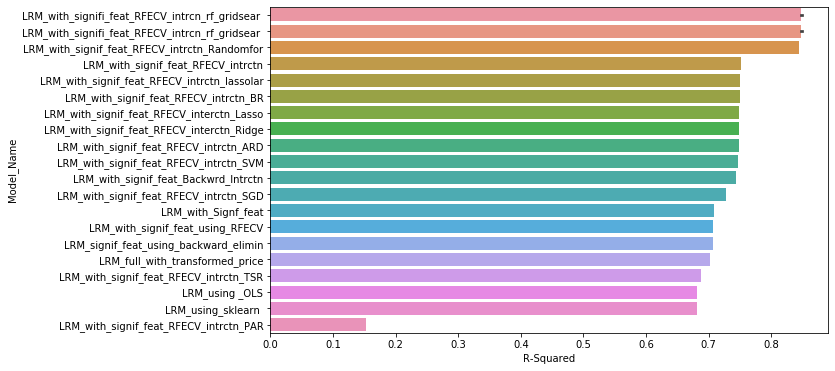

In [225]:
#plot R2 square vs model name
sns.barplot(score_card['R-Squared'],score_card['Model_Name'],
            order=score_card.sort_values('R-Squared',ascending=False).Model_Name)
plt.show()

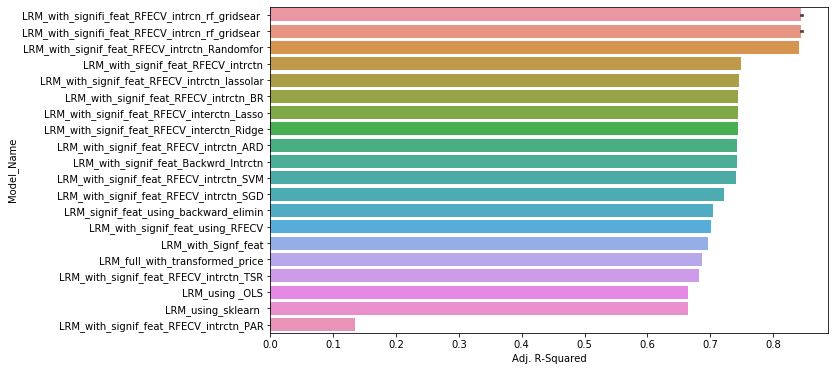

In [226]:
#plot adj R2 vs model name
sns.barplot(score_card['Adj. R-Squared'],score_card['Model_Name'],
            order=score_card.sort_values('Adj. R-Squared',ascending=False).Model_Name)
plt.show()

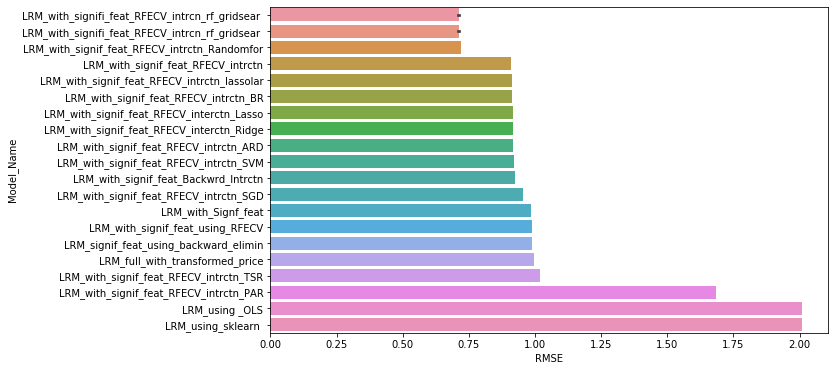

In [227]:
#plot RMSE vs model name
sns.barplot(score_card['RMSE'],score_card['Model_Name'],
            order=score_card.sort_values('RMSE',ascending=True).Model_Name)
plt.show()

Visualize graphically for table

In [228]:
score_card['RMSE']=score_card['RMSE'].astype('float')

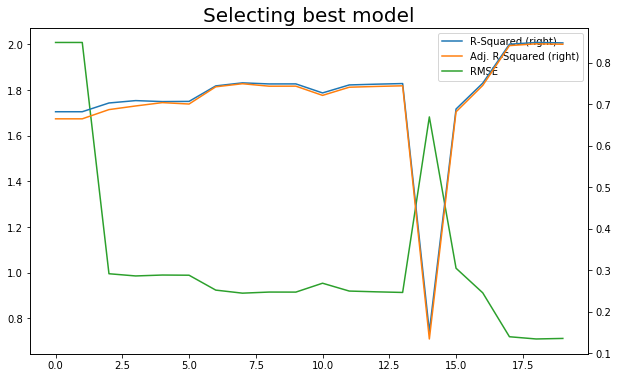

In [229]:
score_card.plot(secondary_y=['R-Squared','Adj. R-Squared'])

# display just the plot
plt.title('Selecting best model',fontsize=20)
plt.show()

Interpretation:
     
 From the above graph we can say that model no:18 is giving the best result.. so, consider the model no:18 `[i.e linreg_model_with_signifi_feat_RFECV_interaction_rf_gridsearch]`. Because Adj R2 square value is more and RMSE value is less.
            
    
   

### 8) Conclusion:

In [230]:
#Using model:18 [i.e linreg_model_with_signifi_feat_RFECV_interaction_rf_gridsearch].

In [231]:
#print coefficients
feat_from_randomforest_grid

features  coef_values
0                   units_sold     0.014089
1            rating_five_count     0.037690
2  product_variation_inventory     0.061950
3        shipping_option_price     0.493695
4    product_variation_size_id     0.041578
5            origin_country_CN     0.000640
6            origin_country_SG     0.000000
7            origin_country_US     0.000506
8            origin_country_VE     0.000000
9                   price_diff     0.349853

In [232]:
#bring to original scale
feat_from_randomforest_grid['coef_values']=sc.inverse_transform(feat_from_randomforest_grid['coef_values'])
feat_from_randomforest_grid

features  coef_values
0                   units_sold     4.471348
1            rating_five_count     4.514482
2  product_variation_inventory     4.558819
3        shipping_option_price     5.347874
4    product_variation_size_id     4.521587
5            origin_country_CN     4.446770
6            origin_country_SG     4.445600
7            origin_country_US     4.446524
8            origin_country_VE     4.445600
9                   price_diff     5.084989

Interpretation:
    
    
     units_sold: 4.471348, it implies that price of product is increases by factor of 4.471348 due to one unit increase in the units_sold, keeping other variables constant

     rating_five_count = 4.514482, it implies that price of product is increases by factor of 4.514482 due to one unit increase in the rating_five_count, keeping other variables constant

     product_variation_inventory = 4.558819, it implies that price of product is increases by factor of 4.558819 due to one unit increase in the product_variation_inventory, keeping other variables constant

    shipping_option_price = 5.347874, it implies that price of product is increases by factor of 5.347874 due to one unit increase in the shipping_option_price , keeping other variables constant

    product_variation_size_id = 4.521587, it implies that price of product is increases by factor of 4.521587 due to one unit increase in the product_variation_size_id , keeping other variables constant

    origin_country_CN = 4.446770, it implies that price of product is increases by factor of 4.446770 due to one unit increase in the origin_country_CN , keeping other variables constant

    origin_country_SG = 4.445600, it implies that price of product is increases by factor of 4.445600 due to one unit increase in the origin_country_SG  , keeping other variables constant

    origin_country_US = 4.446524, it implies that price of product is increases by factor of 4.446524 due to one unit increase in the origin_country_US , keeping other variables constant

    origin_country_VE = 4.445600, it implies that price of product is increases by factor of 4.445600 due to one unit increase in the origin_country_VE , keeping other variables constant

    price_diff = 5.084989, it implies that price of product is increases by factor of 5.084989 due to one unit increase in the price_diff , keeping other variables constant

In [ ]:
#references

https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html --for ols model
https://stackoverflow.com/questions/20701484/why-do-i-get-only-one-parameter-from-a-statsmodels-ols-fit  -- for add constant in xtest 
https://scikit-learn.org/stable/modules/cross_validation.html    -- for cross validation
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html -- for RFECV  
    
https://scikit-learn.org/stable/modules/linear_model.html  -- for type of linear regressor
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 --for tuning randomforest     

                                     *********** Thank you ***********